Coswara: A respiratory sounds and symptoms dataset for remote screening of SARS-CoV-2 infection

Case study Link: https://www.nature.com/articles/s41597-023-02266-0

Abstract:

* The Coswara dataset includes a diverse collection of respiratory sounds and extensive metadata from 2635 individuals, recorded between April 2020 and February 2022.
* It features nine sound categories related to breathing, coughing, and speech, and contains demographic and health information.
* The dataset underwent manual quality annotation of the audio recordings, resulting in 65 hours of curated sound data.
* The paper details the data collection process and provides a demographic and symptoms overview.
* A COVID-19 classifier based on bi-directional long short-term memory (BLSTM) architecture was trained and evaluated to assess the impact of factors like gender, location, and language proficiency on COVID-19 detection performance.
* This study uniquely combines diverse respiratory sounds with rich metadata for COVID-19 screening research.

Capstone goal:
* Classify responses into healthy/non-healthy (neg_no_illness, neg_with_illness, pos_mod, pos_asymp_mild) classes based on the demographic, health information, and audio graphics which contains breathing and coughing sound data using Multimodal machine learning techniques.

# Step 1: Performing Exploratory Data Analysis (EDA) on the Dataset

Exploratory Data Analysis (EDA) is an analysis approach that identifies general
patterns in the data. These patterns include outliers and features of the data that might be unexpected. EDA is an important first step in any data analysis.

Steps performed in EDA are as follows:

* Importing basic libraries for EDA. (All required libraries)
* Data loading and basic data exploration. (shape of dataset)
* Performing descriptive analysis. (data types, min, median, 25%, 75% distribution of data)
* Identifying and treatment of missing values. (na or NaN values in the dataset)
* Identifying and handling of duplicate values in dataset. (removal of duplicates from dataset)
* Removing irrelevant columns for further analysis. (dropping columns)
* Performing data encoding. (converting categorical columns into numerical)
* Identifying correlation in the dataset. (Exploring relationships in dataset)
* Visualize the distribution of Categorical dataset. (Visualize dataset using different scenarios)
* Visualize the distribution of Numerical dataset. (Visualize dataset using different scenarios)
* Identifying and treating of outliers in the dataset. (Checking and removing outliers in dataset)

Importing required libraries

## Data loading and basic data exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing


Reading dataset and printing first 5 rows

In [2]:
data=pd.read_csv('/content/combined_data.csv')
data.head()

,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,rU,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the dimensions (number of rows and columns)

In [3]:
data.shape

(2746, 36)

## Descriptive data analysis

Checking mean, standard deviaiton, min, max, first quartile, third quartile and median values for continuos variable in the dataset

In [4]:
data.describe()

,a,ctScore
count,2746.000000,153.000000
mean,35.154771,5.307190
std,14.096043,5.369604
min,1.000000,0.000000
25%,25.000000,0.000000
50%,31.000000,5.000000
75%,43.750000,8.000000
max,99.000000,25.000000


Checking data types

In [5]:
data.dtypes

id                  object
a                    int64
covid_status        object
record_date         object
ep                  object
g                   object
l_c                 object
l_l                 object
l_s                 object
rU                  object
smoker              object
cold                object
ht                  object
diabetes            object
cough               object
ctDate              object
ctScan              object
ctScore            float64
diarrhoea           object
fever               object
loss_of_smell       object
mp                  object
testType            object
test_date           object
test_status         object
um                  object
vacc                object
bd                  object
others_resp         object
ftg                 object
st                  object
ihd                 object
asthma              object
others_preexist     object
cld                 object
pneumonia           object
dtype: object

From above ctScore is float, a which is age is in integer format and rest are object.

## Identify missing values

Checking number of blanks for each column

In [6]:
data.isna().sum()

id                    0
a                     0
covid_status          0
record_date           0
ep                    0
g                     0
l_c                   0
l_l                 321
l_s                   0
rU                  680
smoker             1660
cold               2258
ht                 2513
diabetes           2514
cough              2094
ctDate             2593
ctScan             1783
ctScore            2593
diarrhoea          2694
fever              2340
loss_of_smell      2577
mp                 2421
testType           1941
test_date          1941
test_status        1413
um                 1038
vacc               1783
bd                 2535
others_resp        2674
ftg                2364
st                 2450
ihd                2709
asthma             2612
others_preexist    2646
cld                2702
pneumonia          2701
dtype: int64

Keeping the missing values same because those values are categorical and cannot be converted to mean or median values for analysis.

## Identify and handle duplicate values

Removing duplicates from dataset

In [7]:
data.drop_duplicates()

,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,rU,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,333NjqA1TfZJuICEdXSkPhVz0LA3,48,positive_asymp,2021-07-13,y,male,India,Thondamuthur,Tamil Nadu,n,...,p,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2742,dpA0EeRrtJUeKJjEuf7BL0AeTJZ2,36,positive_mild,2021-07-06,y,male,India,MSRMC,Karnataka,n,...,p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2743,UXhG3vgoxkWtd4Meky1nm0sRgMV2,76,positive_mild,2021-07-13,y,male,India,Coimbatore,Tamil Nadu,n,...,y,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2744,A5KW9PXraNgckln1gnNaJnX6DvB2,25,positive_moderate,2021-07-01,y,male,India,Coimbatore,Tamil Nadu,n,...,p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking dimension after removing duplicates

In [8]:
data.shape

(2746, 36)

As after removal of duplicated the number of rows and columns remained same (2746 rows and 36 columns) we can say that there was no duplicate records present in the dataset.

## Removing irrelevant columns for futher analysis

Creating a new dataframe to perform next task in analysis.

In [9]:
df1=data
df1.shape

(2746, 36)

In [10]:
df1.columns

Index(['id', 'a', 'covid_status', 'record_date', 'ep', 'g', 'l_c', 'l_l',
       'l_s', 'rU', 'smoker', 'cold', 'ht', 'diabetes', 'cough', 'ctDate',
       'ctScan', 'ctScore', 'diarrhoea', 'fever', 'loss_of_smell', 'mp',
       'testType', 'test_date', 'test_status', 'um', 'vacc', 'bd',
       'others_resp', 'ftg', 'st', 'ihd', 'asthma', 'others_preexist', 'cld',
       'pneumonia'],
      dtype='object')

Removing id, returning user (rU), ep (proficient in english), and date column as they are not needed in further analysis.

In [11]:
df1.drop(columns=['id', 'record_date', 'ctDate', 'test_date', 'rU', 'ep'], axis=1, inplace=True)

In [12]:
df1.shape

(2746, 30)

In [13]:
df1.head()

,a,covid_status,g,l_c,l_l,l_s,smoker,cold,ht,diabetes,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,28,healthy,male,India,Anantapur,Andhra Pradesh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,healthy,male,India,BENGALURU URBAN,Karnataka,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,healthy,female,United States,Pittsburgh,Pennsylvania,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26,healthy,male,India,Bangalore,Karnataka,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,healthy,male,India,Nalanda,Bihar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating clean dataset

Filtering dataset using age group 18-80 in age column

In [14]:
df_age = df1.loc[((df1['a'] >= 18) & (df1['a'] <= 80))]
df_age = df_age.reset_index(drop=True)
df_age.columns = df_age.columns.str.strip()
print(df_age.shape)

(2675, 30)


In [15]:
len(df_age['covid_status']==1)

2675

Creating classes to identify and filter dataset for further analysis:

* neg_no_illness - We identify no COVID records, no respiratory illness, no COVID-like symptoms, no comorbidity here.

* neg_with_illness - We identify records with no COVID, with respiratory illness, with COVID-like symptoms, with comorbidity here.

* pos_no_illness - We identify records with COVID, no respiratory illness, no COVID-like symptoms, no comorbidity here.

* pos_with_illness - We identify records with COVID, with respiratory illness, with COVID-like symptoms, with comorbidity here.

In [16]:
#neg_no_illness
len(df_age.loc[(df_age['covid_status']=='healthy') &
                         ((df_age['asthma']!=True) & (df_age['cld']!=True) & (df_age['pneumonia']!=True) & (df_age['others_resp']!=True)) &
                         ((df_age['ht']!=True) & (df_age['ihd']!=True) & (df_age['diabetes']!=True) &(df_age['others_preexist']!=True)) &
                         ((df_age['cold']!=True) & (df_age['cough']!=True) & (df_age['diarrhoea']!=True) & (df_age['fever']!=True) & (df_age['loss_of_smell']!=True) &
                          (df_age['mp']!=True) & (df_age['bd']!=True) & (df_age['ftg']!=True) & (df_age['st']!=True))
                         ])


1139

In [17]:
#neg_with_illness
len(df_age.loc[(df_age['covid_status']=='healthy') &
                         (((df_age['asthma']==True) | (df_age['cld']==True) | (df_age['pneumonia']==True) | (df_age['others_resp']==True)) |
                         ((df_age['ht']==True) | (df_age['ihd']==True) | (df_age['diabetes']==True) |(df_age['others_preexist']==True)) |
                         ((df_age['cold']==True) | (df_age['cough']==True) | (df_age['diarrhoea']==True) | (df_age['fever']==True) | (df_age['loss_of_smell']==True) |
                          (df_age['mp']==True) | (df_age['bd']==True) | (df_age['ftg']==True) | (df_age['st']==True)))
                         ])

265

In [18]:
#pos_no_illness
len(df_age.loc[((df_age['covid_status']=='positive_asymp') | (df_age['covid_status']=='positive_mild') | (df_age['covid_status']=='positive_moderate')) &
               ((df_age['asthma']!=True) & (df_age['cld']!=True) & (df_age['pneumonia']!=True) & (df_age['others_resp']!=True)) &
               ((df_age['ht']!=True) & (df_age['ihd']!=True) & (df_age['diabetes']!=True) &(df_age['others_preexist']!=True)) &
               ((df_age['cold']!=True) & (df_age['cough']!=True) & (df_age['diarrhoea']!=True) & (df_age['fever']!=True) & (df_age['loss_of_smell']!=True) &
               (df_age['mp']!=True) & (df_age['bd']!=True) & (df_age['ftg']!=True) & (df_age['st']!=True))
                         ])

67

In [19]:
#pos_with_illness
len(df_age.loc[((df_age['covid_status']=='positive_asymp') | (df_age['covid_status']=='positive_mild') | (df_age['covid_status']=='positive_moderate')) &
                         (((df_age['asthma']==True) | (df_age['cld']==True) | (df_age['pneumonia']==True) | (df_age['others_resp']==True)) |
                         ((df_age['ht']==True) | (df_age['ihd']==True) | (df_age['diabetes']==True) |(df_age['others_preexist']==True)) |
                         ((df_age['cold']==True) | (df_age['cough']==True) | (df_age['diarrhoea']==True) | (df_age['fever']==True) | (df_age['loss_of_smell']==True) |
                          (df_age['mp']==True) | (df_age['bd']==True) | (df_age['ftg']==True) | (df_age['st']==True)))
                         ])

592

In [20]:
#pos_asymp
len(df_age.loc[(df_age['covid_status']=='positive_asymp')])

89

In [21]:
#pos_mild
len(df_age.loc[(df_age['covid_status']=='positive_mild')])

410

In [22]:
#pos_asymp_mild
len(df_age.loc[(df_age['covid_status']=='positive_mild') | (df_age['covid_status']=='positive_asymp')])

499

In [23]:
#pos_mod
len(df_age.loc[(df_age['covid_status']=='positive_moderate')])

160

In [24]:
df2 = df_age.copy()
df2['status'] = np.NaN
df2.head()

,a,covid_status,g,l_c,l_l,l_s,smoker,cold,ht,diabetes,...,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia,status
0,28,healthy,male,India,Anantapur,Andhra Pradesh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,healthy,male,India,BENGALURU URBAN,Karnataka,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,healthy,female,United States,Pittsburgh,Pennsylvania,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26,healthy,male,India,Bangalore,Karnataka,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,healthy,male,India,Nalanda,Bihar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df2.shape

(2675, 31)

In [26]:
for i in range(len(df2)):
    # Negative, no illness
    if (df2.at[i,'covid_status']=='healthy') & \
        ((df2.at[i,'asthma']!=True) & (df2.at[i,'cld']!=True) & (df2.at[i,'pneumonia']!=True) & (df2.at[i,'others_resp']!=True)) & \
        ((df2.at[i,'ht']!=True) & (df2.at[i,'ihd']!=True) & (df2.at[i,'diabetes']!=True) &(df2.at[i,'others_preexist']!=True)) & \
        ((df2.at[i,'cold']!=True) & (df2.at[i,'cough']!=True) & (df2.at[i,'diarrhoea']!=True) & (df2.at[i,'fever']!=True) & (df2.at[i,'loss_of_smell']!=True) & \
        (df2.at[i,'mp']!=True) & (df2.at[i,'bd']!=True) & (df2.at[i,'ftg']!=True) & (df2.at[i,'st']!=True)):
        df2.at[i,'status'] = 'neg_no_illness'

    # Negative, with illness
    if (df2.at[i,'covid_status']=='healthy') & \
        (((df2.at[i,'asthma']==True) | (df2.at[i,'cld']==True) | (df2.at[i,'pneumonia']==True) | (df2.at[i,'others_resp']==True)) | \
        ((df2.at[i,'ht']==True) | (df2.at[i,'ihd']==True) | (df2.at[i,'diabetes']==True) |(df2.at[i,'others_preexist']==True)) | \
        ((df2.at[i,'cold']==True) | (df2.at[i,'cough']==True) | (df2.at[i,'diarrhoea']==True) | (df2.at[i,'fever']==True) | (df2.at[i,'loss_of_smell']==True) | \
        (df2.at[i,'mp']==True) | (df2.at[i,'bd']==True) | (df2.at[i,'ftg']==True) | (df2.at[i,'st']==True))):
        df2.at[i,'status'] = 'neg_with_illness'

    # Positive, asymptomatic/mild
    if ((df2.at[i,'covid_status']=='positive_mild') | (df2.at[i,'covid_status']=='positive_asymp')):
        df2.at[i,'status'] = 'pos_asymp_mild'

    if (df2.at[i,'covid_status']=='positive_moderate'):
        df2.at[i,'status'] = 'pos_mod'

In [27]:
df2['status'].value_counts(dropna=False)

status
neg_no_illness      1139
NaN                  612
pos_asymp_mild       499
neg_with_illness     265
pos_mod              160
Name: count, dtype: int64

In [28]:
df_final = df2.dropna(subset=['status'])
df_final['status'].value_counts(dropna=False)

status
neg_no_illness      1139
pos_asymp_mild       499
neg_with_illness     265
pos_mod              160
Name: count, dtype: int64

In [29]:
len(df_final)

2063

Saving the final filtered file for future references

In [30]:
df_final.to_csv('combined_data_filter.csv', index=False)

In [31]:
df1=df_final
df1.shape

(2063, 31)

## Encoding dataset

Checking number of unique values for each feature in original dataset

In [32]:
df1.nunique()

a                   63
covid_status         4
g                    3
l_c                 43
l_l                642
l_s                132
smoker               4
cold                 1
ht                   1
diabetes             1
cough                1
ctScan               2
ctScore             20
diarrhoea            1
fever                1
loss_of_smell        1
mp                   1
testType             3
test_status          3
um                   2
vacc                 3
bd                   1
others_resp          1
ftg                  1
st                   1
ihd                  1
asthma               1
others_preexist      1
cld                  1
pneumonia            1
status               4
dtype: int64

Looking at unique values in original dataset for count less than 9. For unique values more than 9 we will directly encode it.

In [33]:
print('Unique values:\n\n')
for column in df1.columns:
  if df1[column].nunique()<9:
      unique_values = df1[column].unique()
      print(f"{column}': {unique_values}")

Unique values:


covid_status': ['healthy' 'positive_moderate' 'positive_mild' 'positive_asymp']
g': ['male' 'female' 'other']
smoker': [nan 'True' 'n' 'y' 'False']
cold': [nan True]
ht': [nan True]
diabetes': [nan True]
cough': [nan True]
ctScan': [nan 'y' 'n']
diarrhoea': [nan True]
fever': [nan True]
loss_of_smell': [nan True]
mp': [nan True]
testType': [nan 'rtpcr' 'rat' 'False']
test_status': [nan 'p' 'n' 'na']
um': [nan 'y' 'n']
vacc': [nan 'n' 'y' 'p']
bd': [nan True]
others_resp': [nan True]
ftg': [nan True]
st': [nan True]
ihd': [nan True]
asthma': [nan True]
others_preexist': [nan True]
cld': [nan True]
pneumonia': [nan True]
status': ['neg_no_illness' 'neg_with_illness' 'pos_mod' 'pos_asymp_mild']


[Text(0.5, 0, 'Smoker'), Text(0.5, 1.0, 'Smoker distribution')]

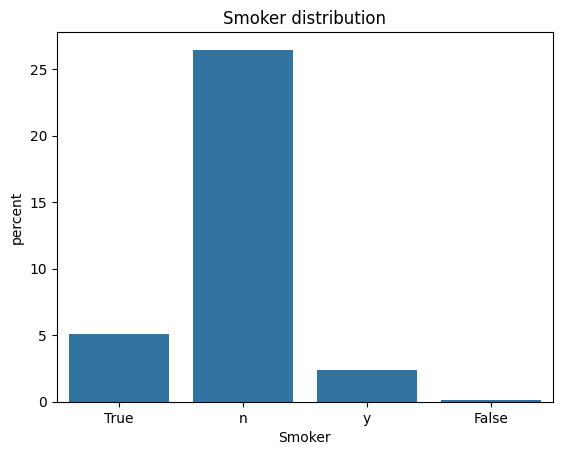

In [34]:
#smoker percent distribution
gfg=sns.countplot(data=df1, x='smoker', stat="percent")
gfg.set(xlabel ="Smoker", title ='Smoker distribution')

[Text(0.5, 0, 'Test type'), Text(0.5, 1.0, 'Test Type distribution')]

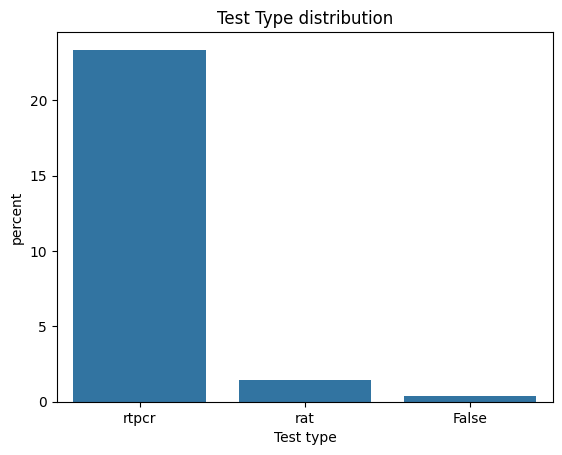

In [35]:
#testtype percent distribution
gfg=sns.countplot(data=df1, x='testType', stat="percent")
gfg.set(xlabel ="Test type", title ='Test Type distribution')

[Text(0.5, 0, 'Test Status'), Text(0.5, 1.0, 'Test status distribution')]

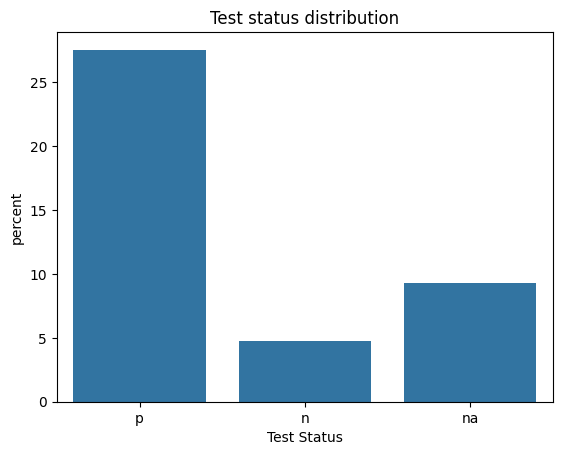

In [36]:
#test status percent distribution
gfg=sns.countplot(data=df1, x='test_status', stat="percent")
gfg.set(xlabel ="Test Status", title ='Test status distribution')

From above unique value description and percent plots we can see few columns has NA (unanswered) values which was either not mentioned in knowledge base description provided by the author and cannot be used in further analysis. Below is our understanding of the dataset and will proceed accordingly.


* Smoker column contains  True, n, y, and False in which we identify y as Yes and n as no for further analysis.
* ctScan contains y and n which we interpret as yes and no respectively.
*Column testType, as per the knowledge described, we have RTPCR or RAT defined so we will ignore false and mark it as nan value.
* test_status column has p, n, ut and na where we ignore na values for further analysis and mark them as unanswered.
* For other columns like cld, fig where we have nan and True while in description they mentioned true or false we will mark nan as an empty value and will ignore in analysis.

For columns with either 1 or more than 9 features we will directly encode it using pandas factorize function.

Creating a new dataframe df for further analysis.

In [37]:
df=df1
columns_to_encode = ['cold', 'ht', 'diabetes', 'cough', 'diarrhoea', 'fever',
       'loss_of_smell', 'mp', 'bd', 'others_resp', 'ftg', 'st', 'ihd',
       'asthma', 'others_preexist', 'cld', 'pneumonia', 'l_c', 'l_l', 'l_s']

# Encode specified columns
for col in columns_to_encode:
    if df[col].dtype == 'object':  # Check if column is object type
        codes, uniques = pd.factorize(df[col])
        df[col] = codes + 1

df

,a,covid_status,g,l_c,l_l,l_s,smoker,cold,ht,diabetes,...,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia,status
0,28,healthy,male,1,1,1,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,neg_no_illness
1,25,healthy,male,1,2,2,True,0,0,0,...,0,0,0,0,0,0,0,0,0,neg_no_illness
2,28,healthy,female,2,3,3,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,neg_no_illness
3,26,healthy,male,1,4,2,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,neg_with_illness
4,32,healthy,male,1,5,4,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,neg_no_illness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,48,positive_asymp,male,1,642,13,n,0,1,1,...,0,0,1,0,0,0,0,0,0,pos_asymp_mild
2671,36,positive_mild,male,1,634,2,y,1,0,0,...,0,0,0,0,0,0,0,0,0,pos_asymp_mild
2672,76,positive_mild,male,1,19,13,n,1,1,1,...,0,0,1,0,0,0,0,0,0,pos_asymp_mild
2673,25,positive_moderate,male,1,19,13,n,1,0,0,...,0,0,0,0,0,0,0,0,0,pos_mod


For other columns which has feature values between 2 and 9 we will follow below procedure in conversion.

Manually encoding values as below:


*   For columns like rU, ep 'y' is encoded as 1 and 'n' as 2
*   For all columns with no values or 'na' or 'nan' are encoded as blank
*   For gender column 'male' is encoded as 1, 'female' as 2, 'other' as 3
*   For testType column 'rtpcr' is encoded as 1, 'rat' as 3
*   For vacc column 'y' is 1 (2 doses), 'p' is 2 (1 doses), 'n' is 3 (unvaccinated)
*   For smoker 'y' & 'True' is encoded as 1, 'n' & 'False' is 2
*   For test_status 'p' is 1, 'n' is 2, 'ut' is encoded as 3
*   For uniformity 'True' or 'y' is 1 and 'False' or 'n' is 2
*   For output variable status we will keep 'neg_no_illness' as 1, 'neg_with_illness' as 2, 'pos_mod' as 3, 'pos_asymp_mild' as 4



In [38]:
df['ctScan'].replace(['y', 'n'],[1,2], inplace=True)
df['um'].replace(['y', 'n'],[1,2], inplace=True)
df['g'].replace(['male', 'female', 'other'],[1,2,3], inplace=True)
df['testType'].replace(['rtpcr', 'rat', 'False'],[1,3,2], inplace=True)
df['vacc'].replace(['n', 'y', 'p'],[3,1,2], inplace=True)
df['smoker'].replace(['True', 'n', 'y', 'False'],[1,2,1,2], inplace=True)
df['test_status'].replace(['p', 'n', 'na', 'ut'],[1,2,np.nan,3], inplace=True)
df['covid_status'].replace(['healthy','no_resp_illness_exposed','resp_illness_not_identified','positive_moderate','recovered_full','positive_mild','positive_asymp','under_validation'],[1,2,3,4,5,6,7,8], inplace=True)
df['status'].replace(['neg_no_illness', 'neg_with_illness', 'pos_mod', 'pos_asymp_mild'],[0,1,2,3], inplace=True)


In [39]:
df.head()

,a,covid_status,g,l_c,l_l,l_s,smoker,cold,ht,diabetes,...,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia,status
0,28,1,1,1,1,1,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,1,1,1,2,2,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,1,2,2,3,3,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,1,1,1,4,2,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,32,1,1,1,5,4,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.shape

(2063, 31)

## Identify Correlation

What is the relationship between correlation values and features is explained below using an image.

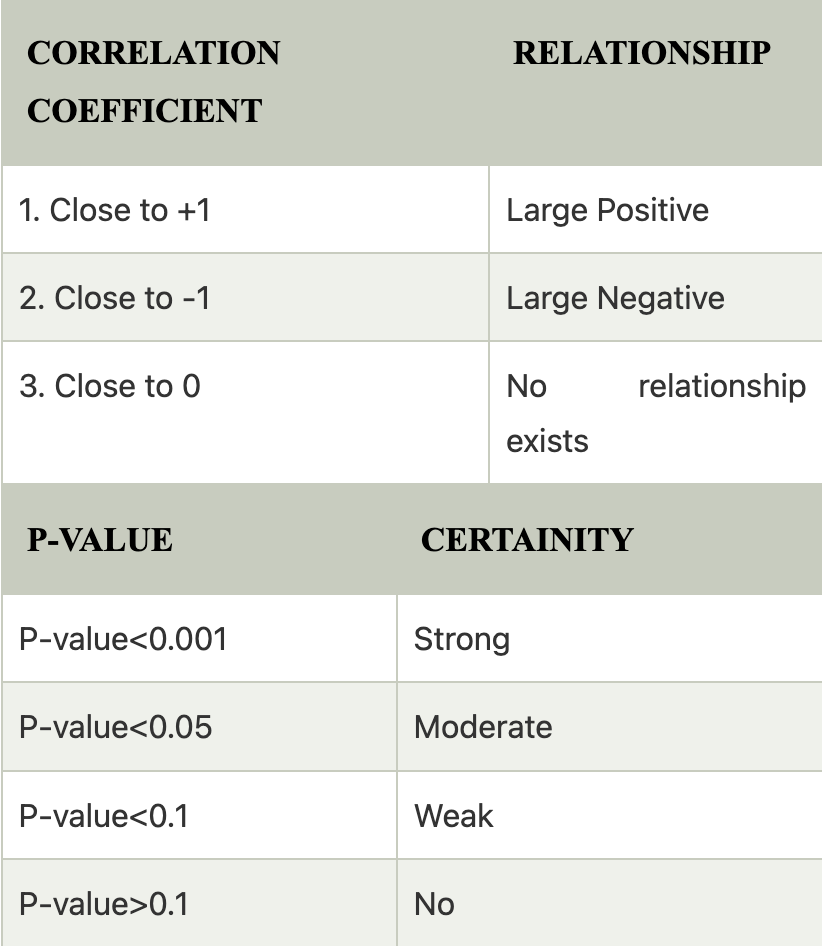

In [41]:
from IPython.display import Image
Image('/content/Screenshot 2024-06-01 at 3.11.01 AM.png', width = 500)

* Using pearson correlation for validating correlation between features.
* In statistics, the Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data.
* It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between -1 and 1.


In [42]:
corr = df.corr('pearson')
corr

,a,covid_status,g,l_c,l_l,l_s,smoker,cold,ht,diabetes,...,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia,status
a,1.000000,0.167148,0.030175,-0.035293,-0.044848,-0.050402,0.141097,0.096126,0.380573,0.405971,...,0.192566,0.137016,0.159937,0.073503,0.148755,0.009094,0.112107,0.083726,0.092320,0.219625
covid_status,0.167148,1.000000,0.133611,-0.121273,-0.181570,-0.180104,0.379670,0.439019,0.135116,0.163254,...,0.226292,0.104229,0.487138,0.379665,0.112815,0.027587,0.171350,0.061810,0.094447,0.962662
g,0.030175,0.133611,1.000000,-0.034601,-0.084862,-0.016511,0.341852,0.069413,-0.001369,-0.007436,...,0.008036,0.050865,0.095588,0.063900,-0.007448,0.009656,0.111093,0.016534,-0.008103,0.118176
l_c,-0.035293,-0.121273,-0.034601,1.000000,0.153805,0.708268,-0.057801,-0.065984,-0.020274,-0.028686,...,-0.041708,-0.017374,-0.077798,-0.055779,-0.016776,0.031947,-0.026556,-0.007902,-0.015031,-0.116250
l_l,-0.044848,-0.181570,-0.084862,0.153805,1.000000,0.285525,-0.173569,-0.135232,-0.013745,-0.034872,...,-0.064128,-0.049785,-0.120278,-0.090121,0.013608,0.012008,-0.061748,0.028498,-0.009807,-0.179986
l_s,-0.050402,-0.180104,-0.016511,0.708268,0.285525,1.000000,-0.068449,-0.090461,-0.021937,-0.036095,...,-0.052351,-0.019179,-0.107336,-0.074406,0.001925,0.050216,-0.027622,0.025465,-0.018283,-0.182201
smoker,0.141097,0.379670,0.341852,-0.057801,-0.173569,-0.068449,1.000000,0.226957,0.060712,0.066035,...,0.110593,0.034828,0.229266,0.138825,-0.022869,-0.028454,0.078827,-0.018041,-0.016089,0.400505
cold,0.096126,0.439019,0.069413,-0.065984,-0.135232,-0.090461,0.226957,1.000000,0.074705,0.111416,...,0.212193,0.084453,0.347200,0.357177,0.085081,0.030961,0.124040,0.021155,0.020177,0.483826
ht,0.380573,0.135116,-0.001369,-0.020274,-0.013745,-0.021937,0.060712,0.074705,1.000000,0.287040,...,0.061628,0.133241,0.106765,0.047491,0.172836,0.031427,0.117787,0.042708,0.023047,0.222572
diabetes,0.405971,0.163254,-0.007436,-0.028686,-0.034872,-0.036095,0.066035,0.111416,0.287040,1.000000,...,0.113024,0.072584,0.140084,0.057524,0.153335,0.044721,0.103556,0.072276,0.114407,0.240704


In [43]:
#Let's check the correlation for the output variable status

correlation_matrix = df.corr()
correlation_matrix['status'].sort_values(ascending=False)

status             1.000000
covid_status       0.962662
cough              0.597606
fever              0.508369
ftg                0.504688
cold               0.483826
mp                 0.452183
st                 0.405943
smoker             0.400505
loss_of_smell      0.300586
bd                 0.252568
diabetes           0.240704
ht                 0.222572
a                  0.219625
others_preexist    0.172421
diarrhoea          0.164339
g                  0.118176
ihd                0.115741
others_resp        0.104292
pneumonia          0.095275
testType           0.094976
asthma             0.072444
cld                0.065534
vacc               0.035117
ctScore           -0.084160
l_c               -0.116250
ctScan            -0.147618
l_l               -0.179986
l_s               -0.182201
um                -0.285807
test_status       -0.884675
Name: status, dtype: float64

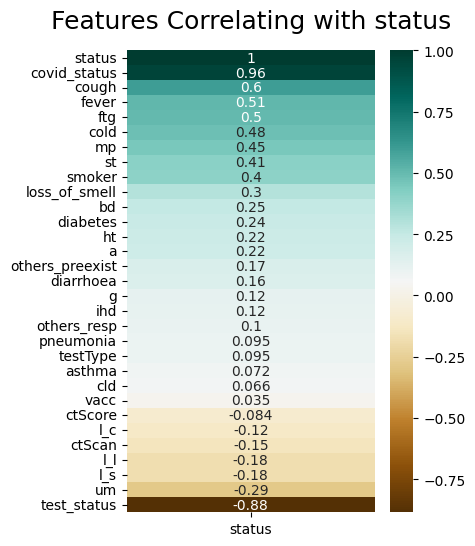

In [44]:
#heatmap of features with status
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df.corr()[['status']].sort_values(by='status', ascending=False), annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with status', fontdict={'fontsize':18}, pad=16);

## Categorical analysis

[Text(0.5, 0, 'Gender'), Text(0.5, 1.0, 'Gender distribution based on status')]

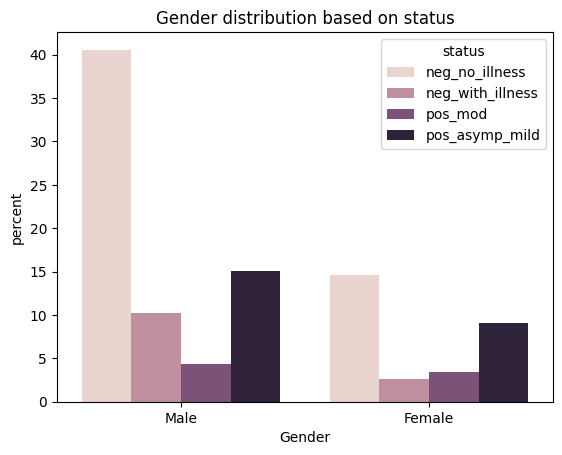

In [45]:
index_names = {'neg_no_illness':'0', 'neg_with_illness':'1', 'pos_mod':'2', 'pos_asymp_mild':'3'}


gfg=sns.countplot(data=df, x=df['g'].map({1: 'Male', 2: 'Female'}), hue="status", stat="percent")
plt.legend(title='status', labels=index_names)
gfg.set(xlabel ="Gender", title ='Gender distribution based on status')

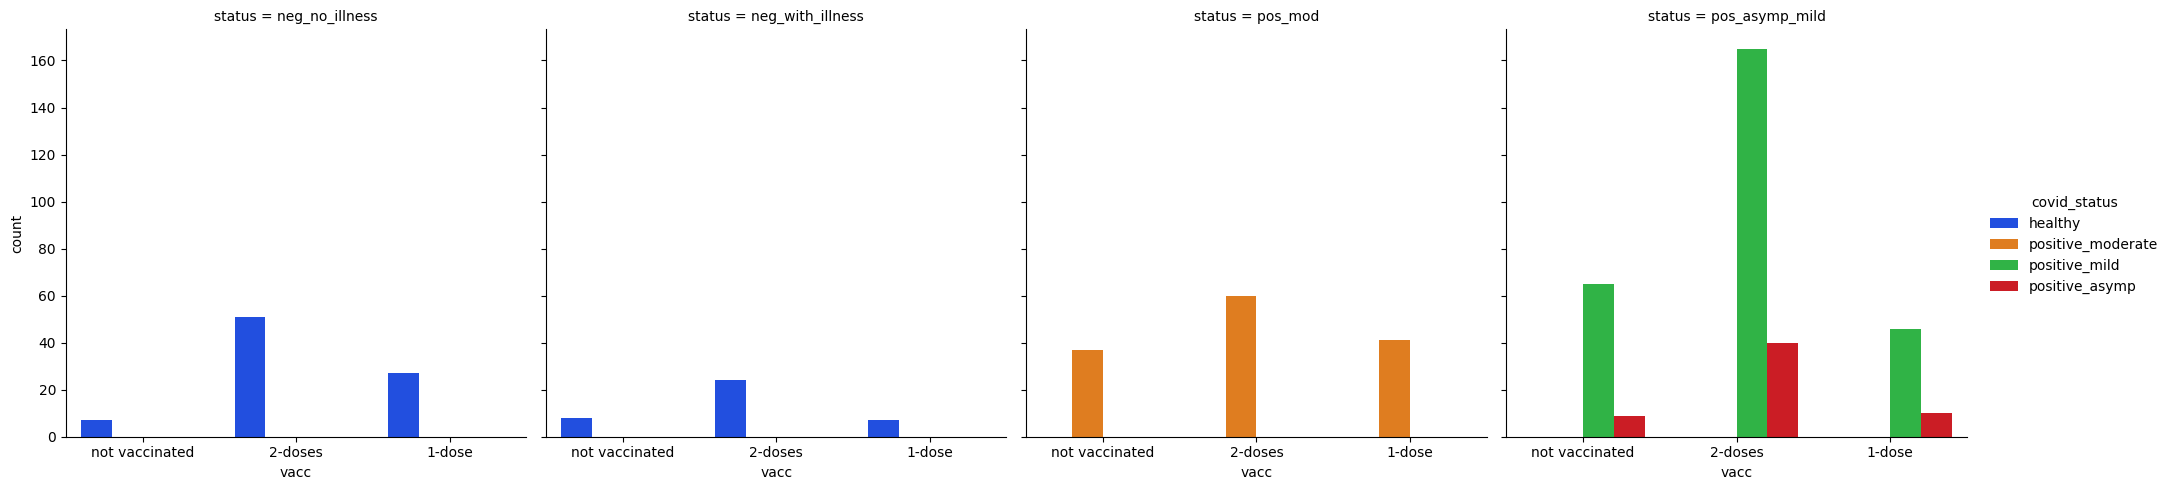

In [46]:
index_names = {'healthy':'1','no_resp_illness_exposed':'2','resp_illness_not_identified':'3'
,'positive_moderate':'4','recovered_full':'5','positive_mild':'6','positive_asymp':'7','under_validation':'8'}

gfg=sns.catplot(data=df, x =df['vacc'].map({1:'2-doses',2:'1-dose',3:'not vaccinated'}),
                hue =df['covid_status'].map({1:'healthy',2:'no_resp_illness_exposed',3:'resp_illness_not_identified'
,4:'positive_moderate',5:'recovered_full',6:'positive_mild',7:'positive_asymp',8:'under_validation'})
                ,kind ='count', col =df['status'].map({0:'neg_no_illness',1:'neg_with_illness',2:'pos_mod',3:'pos_asymp_mild'}),
                palette="bright")

## Numerical analysis

Age distribution based on test status count plot.

[Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Age distribution based on status')]

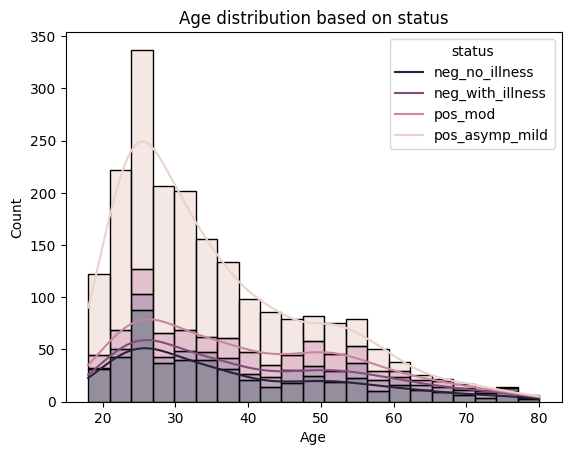

In [47]:
index_names = {'neg_no_illness':'0', 'neg_with_illness':'1', 'pos_mod':'2', 'pos_asymp_mild':'3'}
#custom_palette = ["#008000", "#800000"]

#sns.set_palette(custom_palette)
gfg=sns.histplot(data=df, x='a', kde=True, hue='status', multiple='stack')

plt.legend(title='status', labels=index_names)
gfg.set(xlabel ="Age", title ='Age distribution based on status')


## Outlier - detection and treatment

Reference: https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm#:~:text=Definition%20of%20outliers,what%20will%20be%20considered%20abnormal.

Definition: An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.



Usage of boxplot: The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 - Q1) is called the interquartile range or IQR.

Boxplot with fences: A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

* lower inner fence: Q1 - 1.5*IQR
* upper inner fence: Q3 + 1.5*IQR
* lower outer fence: Q1 - 3*IQR
* upper outer fence: Q3 + 3*IQR

**Here we are only using lower inner fence*

Outlier detection criteria:

* A point beyond an inner fence on either side is considered a mild outlier.
* A point beyond an outer fence is considered an extreme outlier.

Categories for outliers based on number of outliers detected.

* High Outliers: Having significant number of outliers in the dataset.
* Moderate Outliers: Having moderate number of outliers in the dataset.
* low Outliers: Having lower number of outliers in the dataset.
* No Outlier: Feature having no outlier will be here. This means that this feature is clean and has no outlier detected.

Now we have set the criteria and categories for outliers let's see outliers for all of the features using boxplot.

<Axes: >

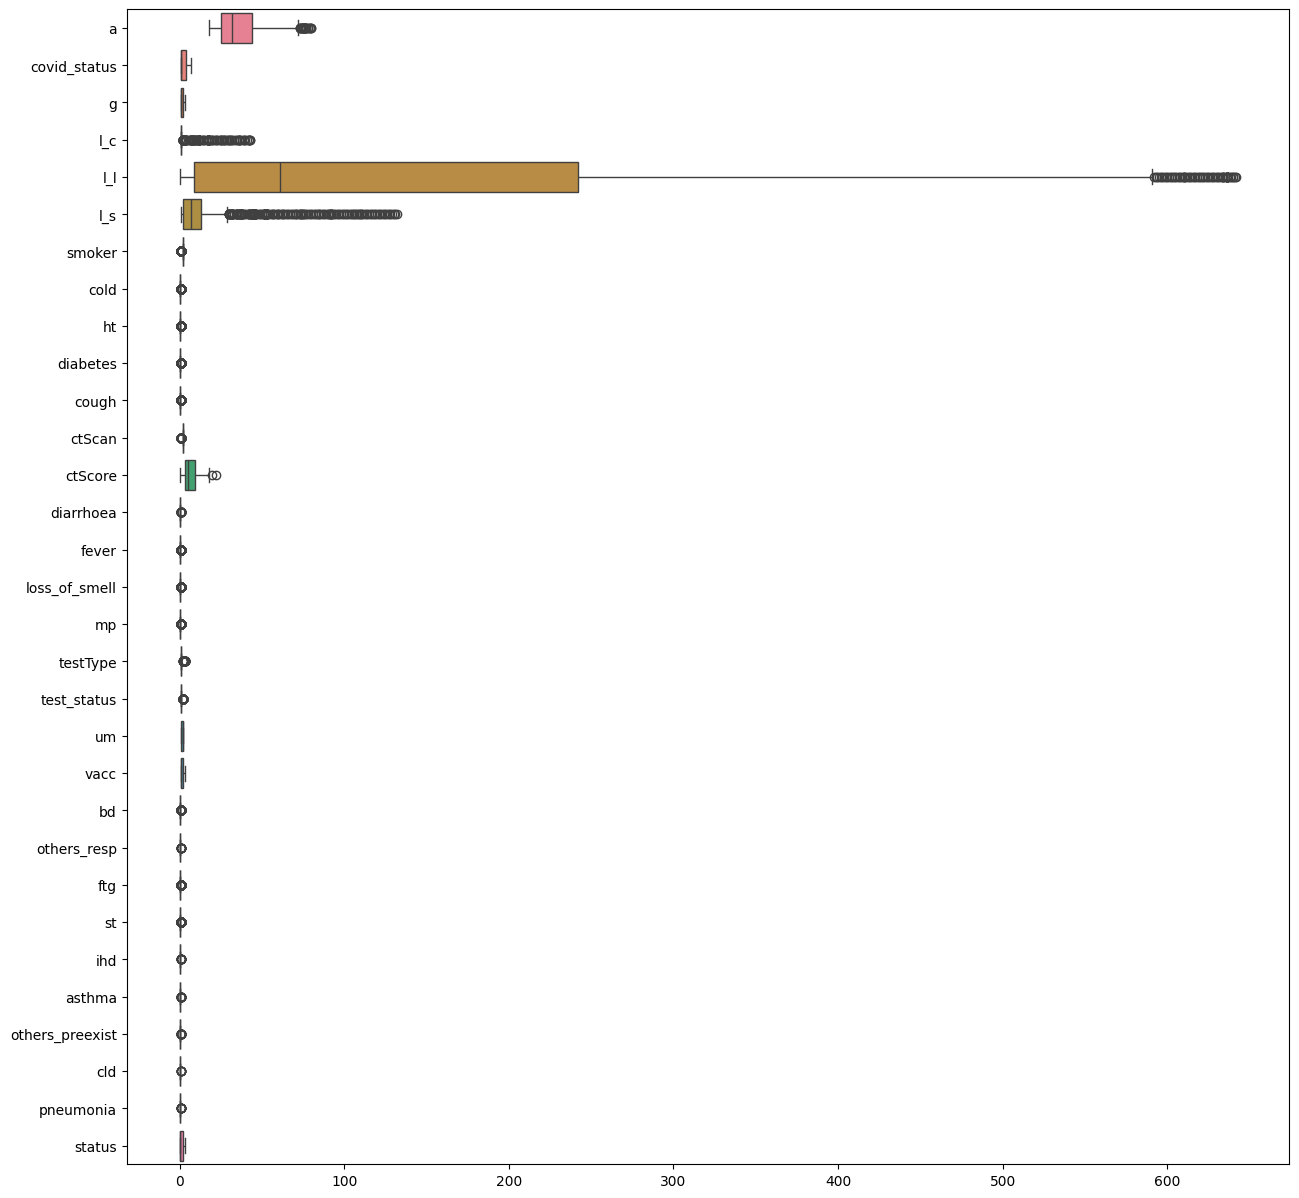

In [48]:
# plot boxplot
#Outlier Detection: Checking for any outlier via boxplot (Outlier shown with a dot, small circle or star)

fig, ax = plt.subplots(figsize=(15,15)) #Sample figsize in inches,change the number accordingly
sns.boxplot(data = df,orient = 'h',ax=ax)


Inference:

* From above it can been seen that l_l (Country list) and l_s (state list), a (age), l_c (city list) has more than 2 outliers so we will keep them in high outlier list.
* For low outliers, features with 1 outlier will be here like smoker, cold, ht, diabetes, cough, ctScan etc.
* Others like covid_status, status which doesn't has any outliers will be in No outliers category.

### High outlier

* For outliers we only have a (age) & ctScore features with actual numerical values so we will use them and treat outliers.

* The rest will be left as is due to their original data type of categorical.

#### For Age feature referenced 'a' in dataset

<Axes: ylabel='a'>

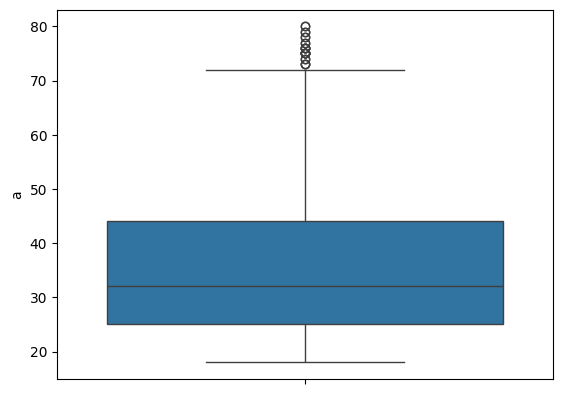

In [49]:
sns.boxplot(df['a'])

In [50]:
# Detecting outlier from 'a' column
print("a:")
print("SUMMARY : ")
print(df['a'].describe().round(2))

def boxplot(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.nanpercentile(datacolumn , [25,75])
  IQR = (Q3 - Q1)
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return Q1,Q3,IQR,lower_range,upper_range

Q1,Q3,IQR,lower_range,upper_range = boxplot(df.a)
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))
# Upper and Lower Range of the dataset

upper_outlier = len(df[df.a > upper_range])
lower_outlier = len(df[df.a < lower_range])
total = len(df[(df.a < lower_range) | (df.a > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in Age Column in the Dataset :", total)

a:
SUMMARY : 
count    2063.00
mean       35.53
std        13.37
min        18.00
25%        25.00
50%        32.00
75%        44.00
max        80.00
Name: a, dtype: float64
BOX PLOT VALUES : 
First Quartile : 25.0
Second Quartile : 44.0
IQR Range : 19.0
Lower Range : -3.5
Upper Range : 72.5
Total Range is as folows
Lower Range : -3.5
Upper Range : 72.5
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 25
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in Age Column in the Dataset : 25


From above it can be seen that a (Age) has some outliers and should be treated. We will use IQR method to treat the above outlier.

In [51]:
# Detecting outlier from 'a' column
print("a:")
print("SUMMARY : ")
print(df['a'].describe().round(2))

def boxplot(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.nanpercentile(datacolumn , [25,75])
  IQR = (Q3 - Q1)
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return Q1,Q3,IQR,lower_range,upper_range

Q1,Q3,IQR,lower_range,upper_range = boxplot(df.a)
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

a:
SUMMARY : 
count    2063.00
mean       35.53
std        13.37
min        18.00
25%        25.00
50%        32.00
75%        44.00
max        80.00
Name: a, dtype: float64
BOX PLOT VALUES : 
First Quartile : 25.0
Second Quartile : 44.0
IQR Range : 19.0
Lower Range : -3.5
Upper Range : 72.5


Inference for a (Age) Column in the Dataset:
* Lower Range : -3.5 so anything less than -3.5 will be treated as Outlier
* Minimum Value : 18.00 which is minimum than 18 is an outlier
* 25% Percentile / 1st Quartile / Lower Quartile / Q1 : 25.00
* 50% Percentile / Median / 2nd Quantile / Q2 : 32.00
* 75% Percentile / 3rd Quartile / Higher Quartile / Q3 : 44.00
* IQR Range / Q3 - Q1 : 19.0
* Upper Range : 72.5 so anything more than 72.5 will be treated as Outlier
* Maximum Value : 80.0 which is greater than 80.0 will be considered as Outlier

In [52]:
# Upper and Lower Range of the dataset

upper_outlier = len(df[df.a > upper_range])
lower_outlier = len(df[df.a < lower_range])
total = len(df[(df.a < lower_range) | (df.a > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in Age Column in the Dataset :", total)

Total Range is as folows
Lower Range : -3.5
Upper Range : 72.5
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 25
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in Age Column in the Dataset : 25


Lower Range : -3.5
Upper Range : 72.5
After Outlier Treatment


<Axes: ylabel='a'>

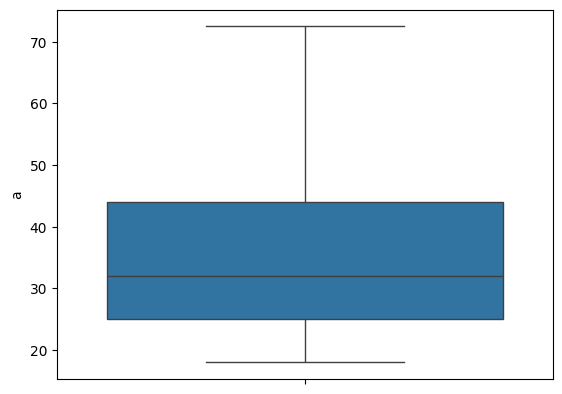

In [53]:
# Outlier Treatment

# Replacing Value below lower range with lower range value
# AND Replacing Value above higher range with higher range value

print("Lower Range :",lower_range.round(1))
print("Upper Range :",upper_range.round(1))
df['a'] = np.where(df['a'] < -3.5, -3.5, df['a'])
df['a'] = np.where(df['a'] > 72.5, 72.5, df['a'])

print("After Outlier Treatment")
sns.boxplot(df['a'])

#### For ctScore feature referenced 'ctScore' in dataset

<Axes: ylabel='ctScore'>

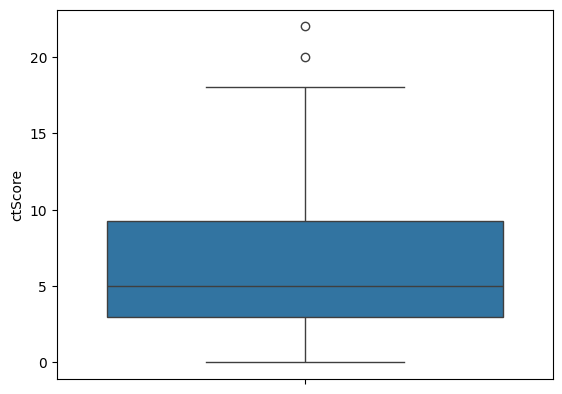

In [54]:
sns.boxplot(df['ctScore'])

In [55]:
# Detecting outlier from 'ctScore' column
print("ctScore:")
print("SUMMARY : ")
print(df['ctScore'].describe().round(2))

Q1,Q3,IQR,lower_range,upper_range = boxplot(df.ctScore)
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))
# Upper and Lower Range of the dataset

upper_outlier = len(df[df.ctScore > upper_range])
lower_outlier = len(df[df.ctScore < lower_range])
total = len(df[(df.ctScore < lower_range) | (df.ctScore > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in ctScore Column in the Dataset :", total)

ctScore:
SUMMARY : 
count    96.00
mean      6.42
std       5.05
min       0.00
25%       3.00
50%       5.00
75%       9.25
max      22.00
Name: ctScore, dtype: float64
BOX PLOT VALUES : 
First Quartile : 3.0
Second Quartile : 9.25
IQR Range : 6.25
Lower Range : -6.38
Upper Range : 18.62
Total Range is as folows
Lower Range : -6.38
Upper Range : 18.62
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 2
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in ctScore Column in the Dataset : 2


From above it can be seen that a (ctScore) has some outliers and should be treated. We will use IQR method to treat the above outlier.

In [56]:
# Detecting outlier from 'ctScore' column
print("ctScore:")
print("SUMMARY : ")
print(df['ctScore'].describe().round(2))
Q1,Q3,IQR,lower_range,upper_range = boxplot(df.ctScore)
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

ctScore:
SUMMARY : 
count    96.00
mean      6.42
std       5.05
min       0.00
25%       3.00
50%       5.00
75%       9.25
max      22.00
Name: ctScore, dtype: float64
BOX PLOT VALUES : 
First Quartile : 3.0
Second Quartile : 9.25
IQR Range : 6.25
Lower Range : -6.38
Upper Range : 18.62


Inference for ctScore Column in the Dataset:
* Lower Range : -6.38 so anything less than -6.38 will be treated as Outlier
* Minimum Value : 0.00 which is minimum than 0.00 is an outlier
* 25% Percentile / 1st Quartile / Lower Quartile / Q1 : 3.00
* 50% Percentile / Median / 2nd Quantile / Q2 : 5.00
* 75% Percentile / 3rd Quartile / Higher Quartile / Q3 : 9.25
* IQR Range / Q3 - Q1 : 6.25
* Upper Range : 18.62 so anything more than 18.62 will be treated as Outlier
* Maximum Value : 22.0 which is greater than 80.0 will be considered as Outlier

In [57]:
# Upper and Lower Range of the dataset

upper_outlier = len(df[df.ctScore > upper_range])
lower_outlier = len(df[df.ctScore < lower_range])
total = len(df[(df.ctScore < lower_range) | (df.ctScore > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in ctScore Column in the Dataset :", total)

Total Range is as folows
Lower Range : -6.38
Upper Range : 18.62
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 2
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in ctScore Column in the Dataset : 2


Lower Range : -6.4
Upper Range : 18.6
After Outlier Treatment


<Axes: ylabel='ctScore'>

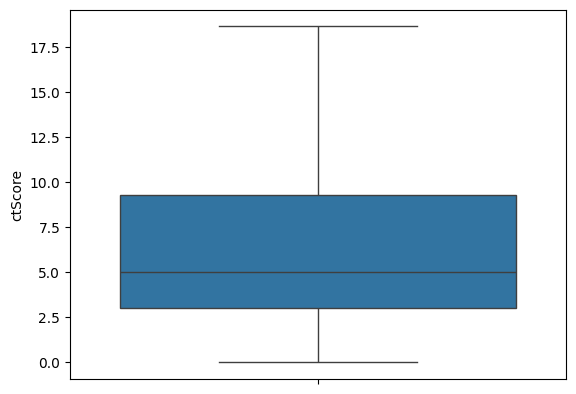

In [58]:
# Outlier Treatment

# Replacing Value below lower range with lower range value
# AND Replacing Value above higher range with higher range value

print("Lower Range :",lower_range.round(1))
print("Upper Range :",upper_range.round(1))
df['ctScore'] = np.where(df['ctScore'] < -6.38, -6.38, df['ctScore'])
df['ctScore'] = np.where(df['ctScore'] > 18.62, 18.62, df['ctScore'])

print("After Outlier Treatment")
sns.boxplot(df['ctScore'])

#### For rest

For the rest (Country, city and state) features we will not treat them and will show the boxplot for each.

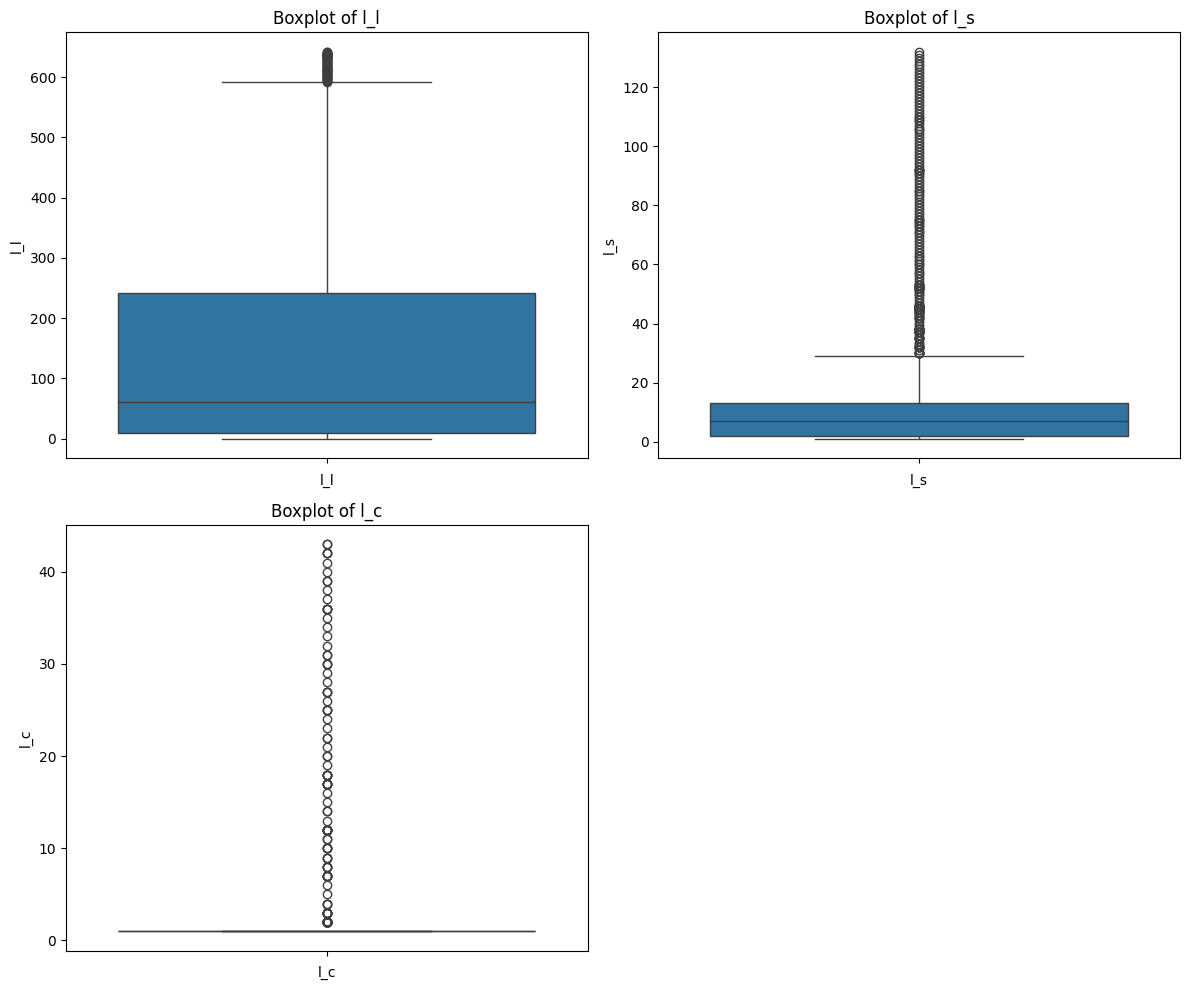

In [59]:
columns=['l_l','l_s','l_c']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

plots_per_row = 4
total_plots = len(columns)
rows = total_plots // plots_per_row + int(total_plots % plots_per_row > 0)


# Loop through columns and create boxplots
for i, col in enumerate(columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)


# Hide any unused subplots
for i in range(total_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

### Low Outlier

For features Smoker, Cold, Ht, Diabetes, Cough, ctScan, Diarrhoea, Fever, loss_of_smell, Mp, testType, test_status, Bd, others_resp, Ftg, St, Ind, Asthma, others_preexist, Cd, and pneumonia we have only 1 outlier so we will just visualize the plot for them.






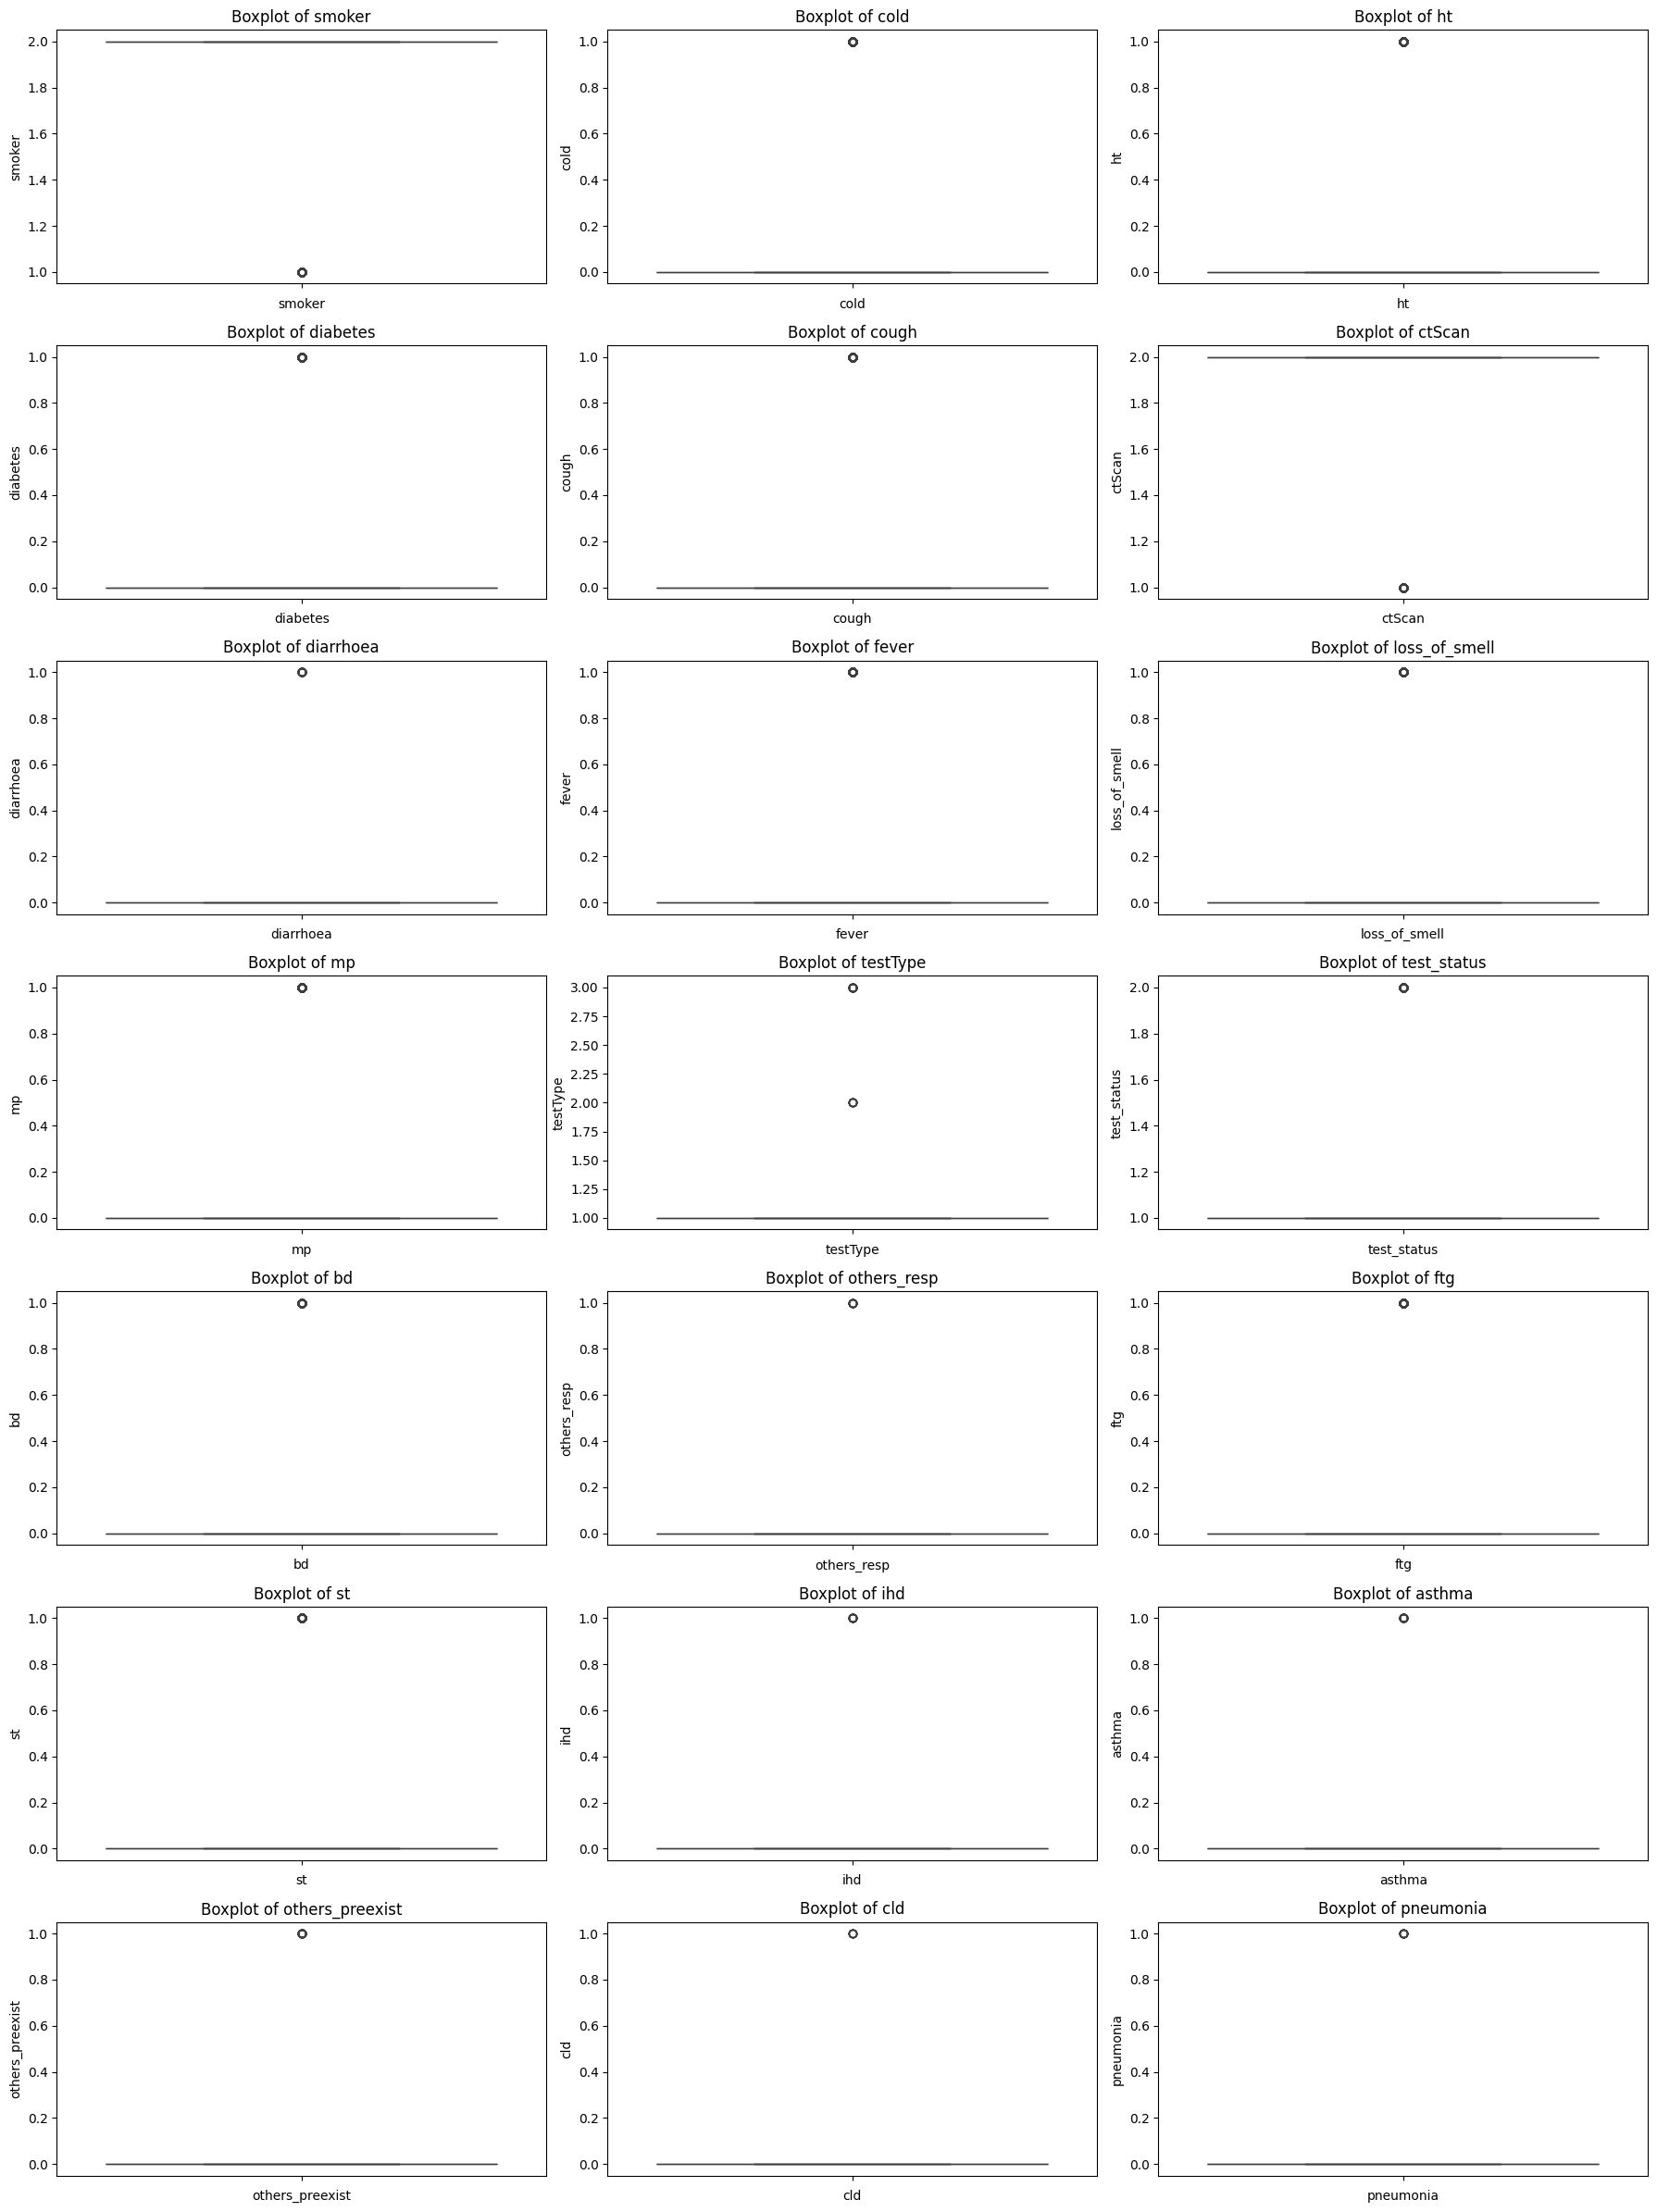

In [60]:
columns = [
    'smoker', 'cold', 'ht', 'diabetes', 'cough', 'ctScan',
    'diarrhoea', 'fever', 'loss_of_smell', 'mp', 'testType',
    'test_status', 'bd', 'others_resp', 'ftg', 'st', 'ihd',
    'asthma', 'others_preexist', 'cld', 'pneumonia'
]

fig, axes = plt.subplots(7, 3, figsize=(18, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

plots_per_row = 3
total_plots = len(columns)
rows = total_plots // plots_per_row + int(total_plots % plots_per_row > 0)

# Loop through columns and create boxplots
for i, col in enumerate(columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for i in range(total_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

Inference:

* From above it can be observed that there is just one outlier present for the features.
* From the knowledge base we know that the value for above categorical values is either True or False.
* The outlier detected is therefore NaN values.
* As these categorical values are needed we will keep this outliers as it is.

### No outlier

For features with no observed outliers let's plot them.

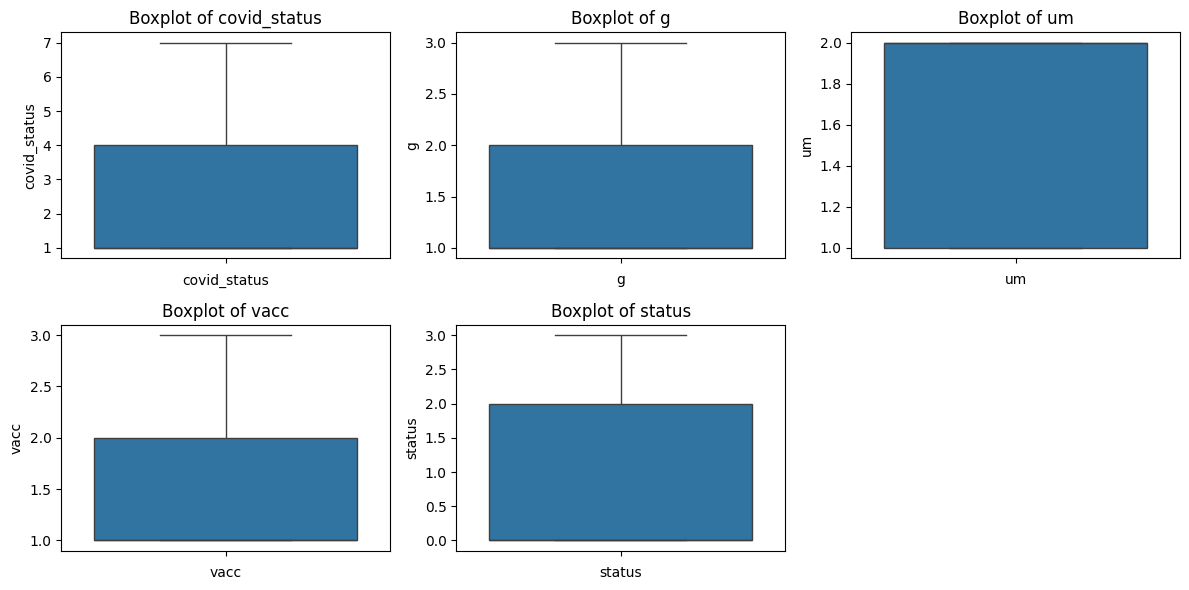

In [61]:
columns=['covid_status','g','um','vacc','status']

fig, axes = plt.subplots(2, 3, figsize=(12, 6))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

plots_per_row = 4
total_plots = len(columns)
rows = total_plots // plots_per_row + int(total_plots % plots_per_row > 0)


# Loop through columns and create boxplots
for i, col in enumerate(columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)


# Hide any unused subplots
for i in range(total_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

The above featues are clean columns with no observed outliers as per our definition.

Inference:

* From above it can be observed that there no outliers observed.
* Hence keeping the way it is for further analysis.

# Step 2: Splitting dataset in two parts, i.e. Train and Test

Creating X as Input or Independent variables and y as Output or Dependent variable

In [62]:
#For our data y is 'status' column i.e, Dependent variable and X is rest of the columns i.e, independent variables
X = df.drop('status', axis=1).values   #Input
y = df['status'].values                #Output

Creating a Train & test model with 80-20 ratio meaning keeping 80% of available data for training and rest 20% of testing.

Basically, for any model to work,
- We need to first train the model and then perform the testing
- So we need to divide our data in 2 parts : Training data and Testing data
- Training(80%) + Testing(20%) (the distribution can also be 50-50%, 70-30%, 60-40%)

- So our X and y will have XTraining, XTesting, yTraining, and yTesting

In [63]:
# Splitting dataset into training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0000)

- The train_test_split will take random set and train, test data using 80% (as we have mentioned *train_size* to 0.8) data.
- So if we run the code 1000 times, for every time the data and result will be different.
- Hence we write random_state=0000 which will make sure the data is same every time. The chosen data will be around 0000
- random_state is the seed value used by the random number generator, it can be any integer.

Now our data is ready for machine learning models.

# Step 3: Implementing different Machine Learning Models

* As our output variable status has 4 distinct values we will use multi-class classification.
* In machine learning, a multi-class classification is a supervised learning technique that classifies instances into three or more classes or categories.
* There are several machine learning techniques we can consider. The choice of technique often depends on factors such as the size and quality of your dataset, the complexity of the problem, and your computational resources.
* Here are a few common techniques which we will use to identify the best fit model for the dataset and then we will compare their results.

    - Gradient Boosting Machine (GBM) using XGBoost
    - Densely Connected Convolutional Networks (DenseNet)
    - Random Forest (Ensemble learning)


## Gradient Boosting Machine (GBM) using XGBoost


Gradient Boosting machine is
* GBM is an ensemble learning algorithm.
* It is a Supervised learning algorithm which attempts to accurately predict the target by combining the estimates of simpler and weaker learners.
  * Learners learn sequentially
  * Converts many weak learners into complex learners
* It is also called as Gradient boosting because it uses a gradient descent procedure to minimize the loss when adding new model to the ensemble.

XGBoost:
* XGBoost or Extreme gradient boosting is an optimized distributed gradient boosting which is highly efficient, flexible and portable especially for dataset with many null values like this one.
* Runs in a parallel tree boosting environment.

In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [65]:
#Labels to map the output variable
label_map = {0: 'neg_no_illness', 1: 'neg_with_illness', 2: 'pos_mod', 3: 'pos_asymp_mild'}

Using XGBClassifier for xgboost with objective as multiclass softmax and num_class or number of distinct classes in output variable as 4

In [66]:
#defining the model
model_gbm = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=0000)

In [67]:
#Importing all the metrics packages

from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, log_loss
from sklearn.calibration import calibration_curve

In [68]:
#Training the model
model_gbm.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [69]:
#Prediction for the trained data and displaying the score

y_pred_train_gbm= model_gbm.predict(X_train)
# Model Accuracy, how often is the classifier correct for the train data
print('Training accuracy score for Gradient Boosting Machine (GBM) model: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_gbm)*100))

Training accuracy score for Gradient Boosting Machine (GBM) model: 100.0000


In [70]:
# comparing actual response values (y_test) with predicted response values (y_pred_test_gbm)

y_pred_test_gbm= model_gbm.predict(X_test)

# Model Accuracy, how often is the classifier correct for test data
print('Testing accuracy score for Gradient Boosting Machine (GBM) model: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_gbm)*100))

Testing accuracy score for Gradient Boosting Machine (GBM) model: 99.5157


* predict_proba returns the probability estimates for the multiclass labels when softmax is used to find the predicted probability of each identified class.
* Multiclass has problem in labeling so we use OVO or OVR method where ovo is less sensitive to imbalanced data hence we will use that.

Let's calculate ROC Curve and AUC

The Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score is a metric used to evaluate the performance of a classification model

* ROC curves and AUC can provide a more comprehensive view of model performance across different thresholds.
* They help to assess the trade-off between true positive rate (recall) and false positive rate (1 - specificity) at various threshold levels.
* Higher ROC-AUC values indicate better discrimination performance, while a value of 0.5 suggests no discrimination (similar to random guessing).
* It's a useful metric for comparing and evaluating the overall performance of different classifiers, especially when dealing with imbalanced datasets or when you want to assess the classifier's ability to rank instances by their likelihood of belonging to the positive class.

In [71]:
# Making the ROC AUC Score
y_pred_prob_gbm = model_gbm.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob_gbm, multi_class='ovo')

0.9983434582390703

It seems that model is performing perfectly well.

Let's calculate Cross-Validation

* Cross-validation is a widely used technique for assessing and validating the performance of a predictive model.
* It helps evaluate a model's ability to generalize to unseen data and provides a more robust estimate of its performance compared to traditional train-test splitting.
* The main idea behind cross-validation is to partition the dataset into multiple subsets, train and test the model multiple times, and then aggregate the performance metrics to get a more reliable estimate.

In [72]:
#Let's calculate the CrossValidation score for the model for 10 folds

from sklearn.model_selection import cross_val_score

scores_gbm = cross_val_score(model_gbm, X, y, scoring='accuracy', cv = 10)

print("Cross Validation Scores: ", scores_gbm)
print("Average Cross Validation Score: ", scores_gbm.mean()*100)
print("Number of Cross Validation Scores used in Average: ", len(scores_gbm))

Cross Validation Scores:  [0.99516908 0.99516908 1.         1.         0.99029126 1.
 0.99514563 0.99029126 1.         0.99514563]
Average Cross Validation Score:  99.61211950658976
Number of Cross Validation Scores used in Average:  10


Let's implement Confusion Matrix:

Confusion Matrix: It is the table presentation for TP, FP, FN, TN where TP+Tn gives the count of correct predictions and FP+FN gives the count of incorrect predictions

* True Positives (TP): Instances correctly classified as class 1 (positive class).
* True Negatives (TN): Instances correctly classified as class 0 (negative class).
* False Positives (FP): Instances incorrectly classified as class 1 when they are actually class 0 (Type I error).
* False Negatives (FN): Instances incorrectly classified as class 0 when they are actually class 1 (Type II error).

For multiclass, we see diagonal values are the predicted class while the rest are predicted incorrectly.
We read column values as the actual labels while row are the identified class.

Confusion Matrix : 
 [[212   0   0   0]
 [  2  51   0   0]
 [  0   0  31   0]
 [  0   0   0 117]]


<Axes: >

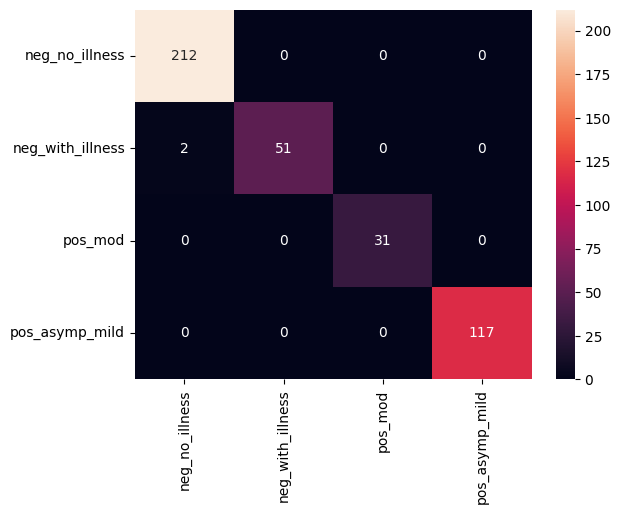

In [73]:
# Making the Confusion Matrix = The table in the PPT with TP, FP, FN, TN
cm_labels = [label_map[i] for i in range(len(np.unique(y_test)))]
cm=confusion_matrix(y_test, y_pred_test_gbm)
print('Confusion Matrix : \n', cm)
sns.heatmap(confusion_matrix(y_test, y_pred_test_gbm),fmt='.4g',annot=True, xticklabels=cm_labels, yticklabels=cm_labels)

Sensitivity and specificity are two important measures used to evaluate the performance of diagnostic tests or classification models.

Sensitivity (also called recall or true positive rate):
- Measures the proportion of actual positive cases that are correctly identified
- Calculated as: True Positives / (True Positives + False Negatives)
- Indicates how well the test identifies people who actually have the condition
- A high sensitivity (1) means the test rarely misses positive cases

Specificity:
- Measures the proportion of actual negative cases that are correctly identified
- Calculated as: True Negatives / (True Negatives + False Positives)
- Indicates how well the test identifies people who do not have the condition
- A high specificity (1) means the test rarely misidentifies negative cases as positive

In [74]:
#Defining the function for sensitivity and specificity
def calculate_sensitivity_specificity(cm):
    sensitivities = {}
    specificities = {}

    for i in range(len(cm)):
        # Sensitivity (Recall) for class i
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        sensitivity = tp / (tp + fn)

        # Specificity for class i
        tn = cm.sum() - (cm[:, i].sum() + cm[i, :].sum() - tp)
        fp = cm[:, i].sum() - tp
        specificity = tn / (tn + fp)

        sensitivities[label_map[i]] = sensitivity
        specificities[label_map[i]] = specificity

    return sensitivities, specificities

In [75]:
#Calculating and printing the values
sensitivities, specificities = calculate_sensitivity_specificity(cm)
for cls in sensitivities:
    print(f'Class {cls}: Sensitivity (Recall): {sensitivities[cls]:.4f}')
    print(f'Class {cls}: Specificity: {specificities[cls]:.4f}')

Class neg_no_illness: Sensitivity (Recall): 1.0000
Class neg_no_illness: Specificity: 0.9900
Class neg_with_illness: Sensitivity (Recall): 0.9623
Class neg_with_illness: Specificity: 1.0000
Class pos_mod: Sensitivity (Recall): 1.0000
Class pos_mod: Specificity: 1.0000
Class pos_asymp_mild: Sensitivity (Recall): 1.0000
Class pos_asymp_mild: Specificity: 1.0000


Log Loss:

- Log loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1.
- A lower log loss indicates better performance. Perfect predictions would result in a log loss of 0.

In [76]:
# Log Loss
log_loss_value = log_loss(y_test, y_pred_prob_gbm)
print(f'Log Loss: {log_loss_value:.4f}')

Log Loss: 0.0262


Calibration curve:
A calibration curve, also known as a reliability curve in the context of machine learning, is a graphical representation used to evaluate the accuracy of predicted probabilities from a classification model.

- A perfectly calibrated model will have a calibration curve that lies along the 45-degree diagonal line, indicating that predicted probabilities match observed frequencies.
- If the curve lies above the diagonal line, the model is overconfident, meaning it predicts higher probabilities than the actual success rate.
- If the curve lies below the diagonal line, the model is underconfident, meaning it predicts lower probabilities than the actual success rate.

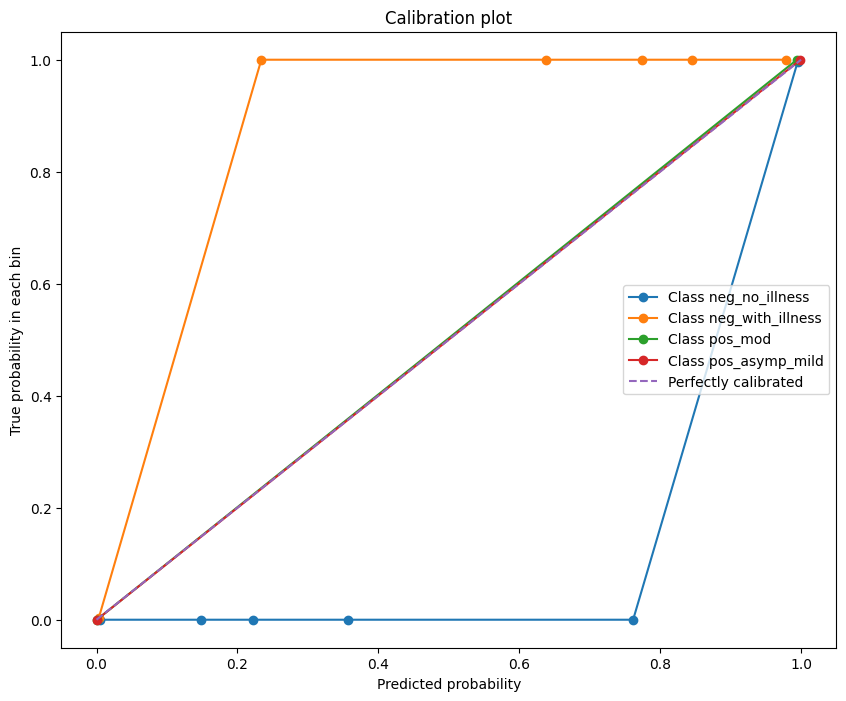

In [77]:
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    prob_true, prob_pred = calibration_curve(y_test == i, y_pred_prob_gbm[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'Class {label_map[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability in each bin')
plt.title('Calibration plot')
plt.legend()
plt.show()

Let's generate classification report

Classification Report: It provides the metrics that are typically calculated separately for each class(output fields) in the classification problem.
   - The classes are represented as "class 0" and "class 1" or numerically as "0" and "1."
        - Class 0: Often referred to as the "negative class" or "majority class." This class represents the instances in our dataset that belong to the class we are not trying to predict. It's the class we're trying to distinguish from the positive class (class 1).
        - Class 1: Often referred to as the "positive class" or "minority class." This class represents the instances in our dataset that belong to the class we are trying to predict or detect. It's the class we're interested in identifying or classifying.
   - Precision, recall, and F1-score are three important metrics used to evaluate the performance of classification models, particularly in cases where class imbalance exists.
        - Precision: it tells us how many of the predicted positive instances are actually positive. It is concerned with minimizing false positives.
             - It answers the question: "Of all the instances the model predicted as positive, how many were actually positive?"
             - Precision is calculated as: TP / (TP + FP)
             - A high precision indicates that when the model predicts a positive class, it is likely to be correct, but it doesn't consider whether the model is missing any actual positive instances.
        - Recall: it tells you how many of the actual positive instances were correctly predicted. It is concerned with minimizing false negatives.
             - It answers the question: "Of all the actual positive instances, how many did the model correctly predict as positive?"
             - Recall is calculated as: TP / (TP + FN)
             - A high recall indicates that the model is effective at identifying most of the actual positive instances, but it doesn't consider whether there are many false alarms (false positives).
        - F1-Score: it is a balanced measure that considers both precision and recall. It is useful when we want to evaluate the overall performance of a classification model, especially in imbalanced datasets.
             - F1-Score is calculated as: 2 * (Precision * Recall) / (Precision + Recall)


In [78]:
#Classification report of test data
target_names = [label_map[i] for i in sorted(label_map.keys())]
print('classification report : \n', classification_report(y_test, y_pred_test_gbm, target_names=target_names))

classification report : 
                   precision    recall  f1-score   support

  neg_no_illness       0.99      1.00      1.00       212
neg_with_illness       1.00      0.96      0.98        53
         pos_mod       1.00      1.00      1.00        31
  pos_asymp_mild       1.00      1.00      1.00       117

        accuracy                           1.00       413
       macro avg       1.00      0.99      0.99       413
    weighted avg       1.00      1.00      1.00       413



Inference:
* Accuracy for training data is 100% and that of testing data is 99.5% which means that the model performed extremely well.
* The score for cross validation is 99.6% for 10 folds indicating a strong model.
* The ROC Curve score 0.99 which indicates high discrimination ability of the model.
* Overall the model is perfoming well with precision, recall and f1-score values indicating the same.

## Densely Connected Convolutional Networks (DenseNet)

* A DenseNet is a type of convolutional neural network that utilises dense connections between layers, through Dense Blocks, where we connect all layers (with matching feature-map sizes) directly with each other.
* It is applicable to a variety of computer vision applications including picture classification, object identification, and semantic segmentation.

In [79]:
#Importing required libraries
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, concatenate, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, concatenate, Flatten
from sklearn.preprocessing import OneHotEncoder

In [80]:
# Define the model
def build_densenet_model(input_shape):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    return model

input_shape = X_train.shape[1]
model_dnet = build_densenet_model(input_shape)

In [81]:
# Compile the model
model_dnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [82]:
# encoding y_train for multiclass
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

In [83]:
# Train the model using the encoded target variable and store the training history
dnet = model_dnet.fit(X_train, y_train_encoded, epochs=5, batch_size=32)

Epoch 1/5
52/52 [==============================] - 5s 92ms/step - loss: nan - accuracy: 0.5618
Epoch 2/5
52/52 [==============================] - 4s 73ms/step - loss: nan - accuracy: 0.5618
Epoch 3/5
52/52 [==============================] - 4s 74ms/step - loss: nan - accuracy: 0.5618
Epoch 4/5
52/52 [==============================] - 5s 91ms/step - loss: nan - accuracy: 0.5618
Epoch 5/5
52/52 [==============================] - 4s 73ms/step - loss: nan - accuracy: 0.5618


In [85]:
#Prediction for the trained data and displaying the score

y_pred_train_dnet= model_dnet.predict(X_train)
# Convert predictions to class labels
y_pred_train_dnet_labels = np.argmax(y_pred_train_dnet, axis=1)


# Model Accuracy, how often is the classifier correct for the train data
print('Training accuracy score for DenseNet model: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_dnet_labels)*100))

52/52 [==============================] - 1s 9ms/step
Training accuracy score for DenseNet model: 56.1818


In [86]:
# comparing actual response values (y_test) with predicted response values (y_pred_test)

y_pred_test_dnet= model_dnet.predict(X_test)
# Convert predictions to class labels
y_pred_test_dnet_labels = np.argmax(y_pred_test_dnet, axis=1)

# Model Accuracy, how often is the classifier correct for test data
print('Testing accuracy score for DenseNet model: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_dnet_labels)*100))

13/13 [==============================] - 0s 12ms/step
Testing accuracy score for DenseNet model: 51.3317


<Axes: >

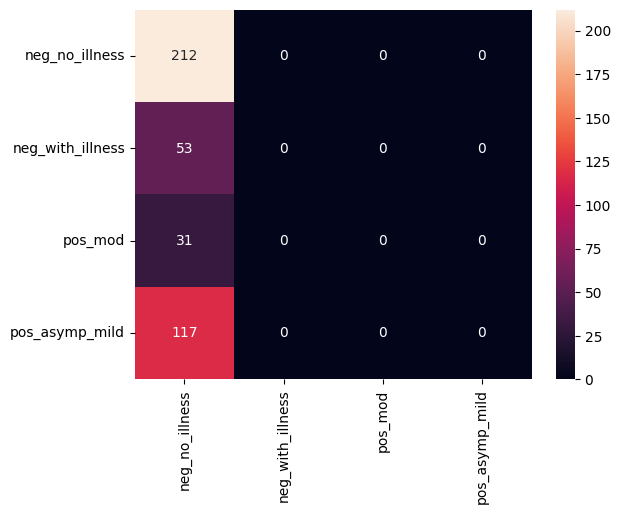

In [87]:
#Confusion matrix
cm_dnet = confusion_matrix(y_test, y_pred_test_dnet_labels)
sns.heatmap(cm_dnet, annot=True, fmt='.4g', xticklabels=cm_labels, yticklabels=cm_labels)

In [88]:
#Calculating and printing the values
sensitivities, specificities = calculate_sensitivity_specificity(cm_dnet)
for cls in sensitivities:
    print(f'Class {cls}: Sensitivity (Recall): {sensitivities[cls]:.4f}')
    print(f'Class {cls}: Specificity: {specificities[cls]:.4f}')

Class neg_no_illness: Sensitivity (Recall): 1.0000
Class neg_no_illness: Specificity: 0.0000
Class neg_with_illness: Sensitivity (Recall): 0.0000
Class neg_with_illness: Specificity: 1.0000
Class pos_mod: Sensitivity (Recall): 0.0000
Class pos_mod: Specificity: 1.0000
Class pos_asymp_mild: Sensitivity (Recall): 0.0000
Class pos_asymp_mild: Specificity: 1.0000


In [89]:
# Log Loss
y_pred_logits = model_dnet.predict(X_test)
y_pred_proba = np.exp(y_pred_logits) / np.sum(np.exp(y_pred_logits), axis=1, keepdims=True)
y_pred_proba = np.nan_to_num(y_pred_proba, nan=1e-10)
log_loss_value = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {log_loss_value:.4f}')

13/13 [==============================] - 0s 10ms/step
Log Loss: 1.3863


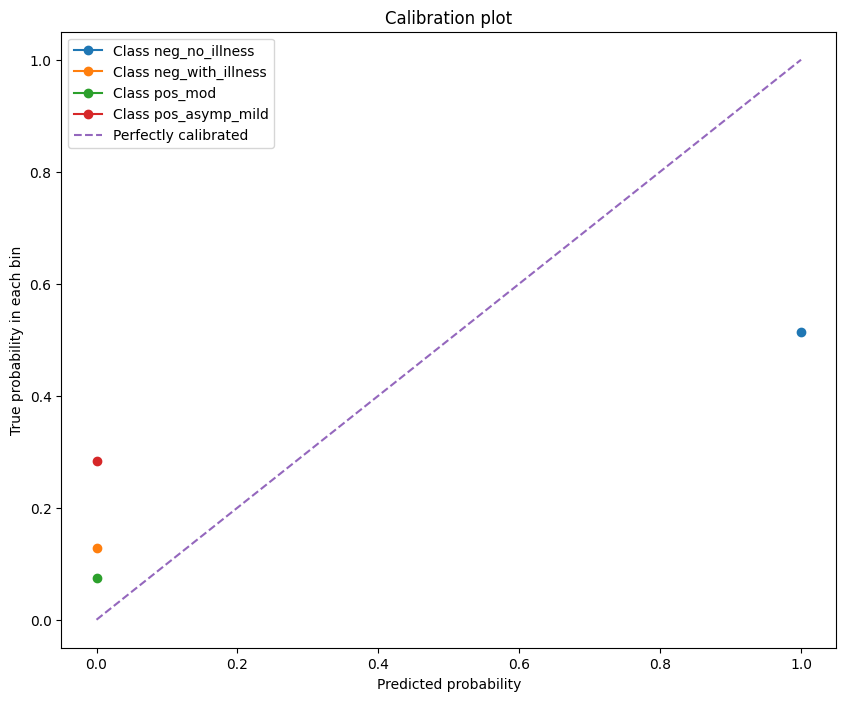

In [90]:
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    prob_true, prob_pred = calibration_curve(y_test==i, y_pred_test_dnet_labels==i, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'Class {label_map[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability in each bin')
plt.title('Calibration plot')
plt.legend()
plt.show()

In [91]:
print('classification report : \n', classification_report(y_test, y_pred_test_dnet_labels))

classification report : 
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       212
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00       117

    accuracy                           0.51       413
   macro avg       0.13      0.25      0.17       413
weighted avg       0.26      0.51      0.35       413



Inference:

- Accuracy of Training was 56.18% and of testing was 51.33%.
- By observing the precision, recall and f1-score it seems that the model is average and needs improvement

Let's improve this accuracy by adding more layers.

In [92]:
# Define the model
def build_densenet_model2(input_shape):
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    return model

input_shape_2 = X_train.shape[1]
model_dnet_2 = build_densenet_model2(input_shape_2)

In [93]:
# Compile the model
model_dnet_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [94]:
# Train the model using the encoded target variable and store the training history
dnet_2 = model_dnet_2.fit(X_train, y_train_encoded, epochs=15, batch_size=64)

Epoch 1/15
26/26 [==============================] - 3s 128ms/step - loss: nan - accuracy: 0.5618
Epoch 2/15
26/26 [==============================] - 4s 167ms/step - loss: nan - accuracy: 0.5618
Epoch 3/15
26/26 [==============================] - 3s 128ms/step - loss: nan - accuracy: 0.5618
Epoch 4/15
26/26 [==============================] - 3s 130ms/step - loss: nan - accuracy: 0.5618
Epoch 5/15
26/26 [==============================] - 4s 135ms/step - loss: nan - accuracy: 0.5618
Epoch 6/15
26/26 [==============================] - 4s 160ms/step - loss: nan - accuracy: 0.5618
Epoch 7/15
26/26 [==============================] - 3s 126ms/step - loss: nan - accuracy: 0.5618
Epoch 8/15
26/26 [==============================] - 3s 125ms/step - loss: nan - accuracy: 0.5618
Epoch 9/15
26/26 [==============================] - 4s 161ms/step - loss: nan - accuracy: 0.5618
Epoch 10/15
26/26 [==============================] - 4s 167ms/step - loss: nan - accuracy: 0.5618
Epoch 11/15
26/26 [==========

In [95]:
#Prediction for the trained data and displaying the score

y_pred_train_dnet= model_dnet_2.predict(X_train)
# Convert predictions to class labels
y_pred_train_dnet_labels = np.argmax(y_pred_train_dnet, axis=1)


# Model Accuracy, how often is the classifier correct for the train data
print('Training accuracy score for DenseNet model with additional layer is: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_dnet_labels)*100))

52/52 [==============================] - 1s 16ms/step
Training accuracy score for DenseNet model with additional layer is: 56.1818


In [105]:
# comparing actual response values (y_test) with predicted response values (y_pred_test)

y_pred_test_dnet= model_dnet_2.predict(X_test)
# Convert predictions to class labels
y_pred_test_dnet_labels = np.argmax(y_pred_test_dnet, axis=1)

# Model Accuracy, how often is the classifier correct for test data
print('Testing accuracy score for DenseNet model with additional layer is: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_dnet_labels)*100))

13/13 [==============================] - 0s 29ms/step
Testing accuracy score for DenseNet model with additional layer is: 51.3317


<Axes: >

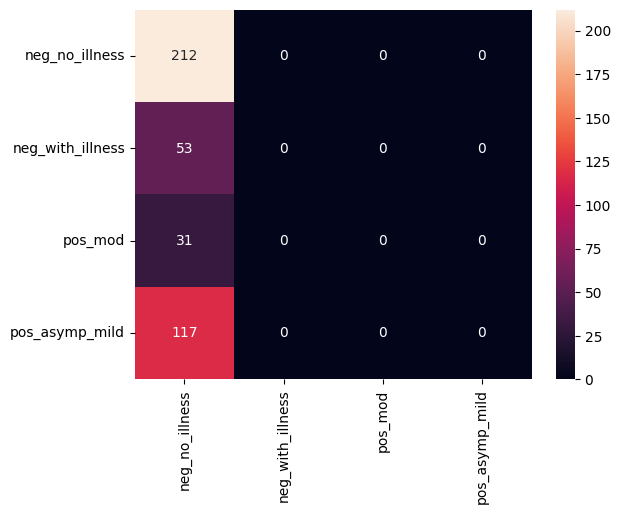

In [106]:
#Confusion matrix
cm_dnet = confusion_matrix(y_test, y_pred_test_dnet_labels)
sns.heatmap(cm_dnet, annot=True, fmt='.4g', xticklabels=cm_labels, yticklabels=cm_labels)

In [107]:
#Calculating and printing the values
sensitivities, specificities = calculate_sensitivity_specificity(cm_dnet)
for cls in sensitivities:
    print(f'Class {cls}: Sensitivity (Recall): {sensitivities[cls]:.4f}')
    print(f'Class {cls}: Specificity: {specificities[cls]:.4f}')

Class neg_no_illness: Sensitivity (Recall): 1.0000
Class neg_no_illness: Specificity: 0.0000
Class neg_with_illness: Sensitivity (Recall): 0.0000
Class neg_with_illness: Specificity: 1.0000
Class pos_mod: Sensitivity (Recall): 0.0000
Class pos_mod: Specificity: 1.0000
Class pos_asymp_mild: Sensitivity (Recall): 0.0000
Class pos_asymp_mild: Specificity: 1.0000


In [108]:
# Log Loss
y_pred_logits = model_dnet_2.predict(X_test)
y_pred_proba = np.exp(y_pred_logits) / np.sum(np.exp(y_pred_logits), axis=1, keepdims=True)
y_pred_proba = np.nan_to_num(y_pred_proba, nan=1e-10)
log_loss_value = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {log_loss_value:.4f}')

13/13 [==============================] - 0s 15ms/step
Log Loss: 1.3863


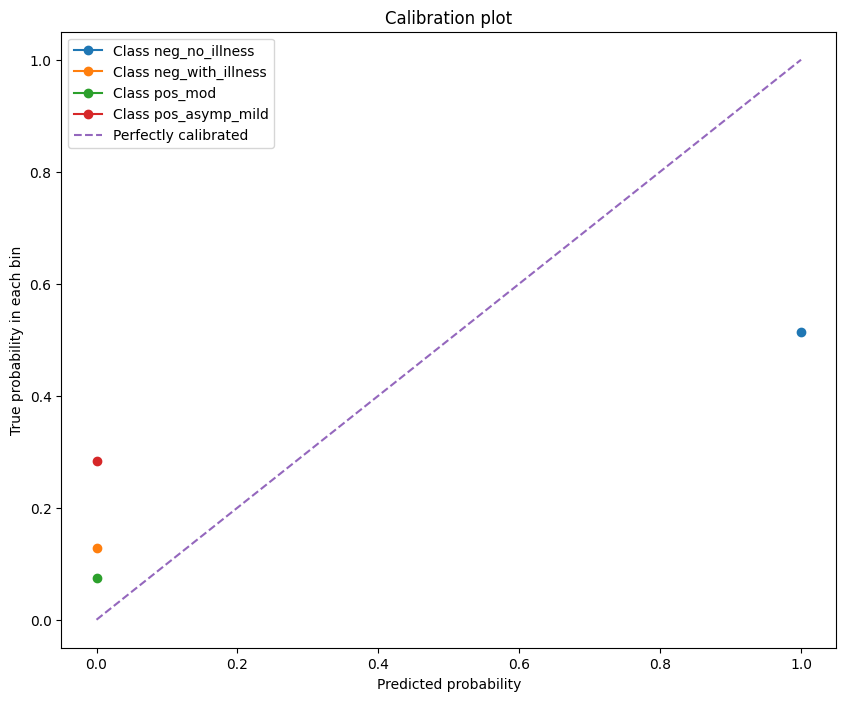

In [109]:
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    prob_true, prob_pred = calibration_curve(y_test==i, y_pred_test_dnet_labels==i, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'Class {label_map[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability in each bin')
plt.title('Calibration plot')
plt.legend()
plt.show()

In [97]:
print('classification report : \n', classification_report(y_test, y_pred_test_dnet_labels))

classification report : 
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       212
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00       117

    accuracy                           0.51       413
   macro avg       0.13      0.25      0.17       413
weighted avg       0.26      0.51      0.35       413



Inference:
* Even after adding additional layer the precision, recall, and f1-score remained similar defaulting to the model being average.
* The Training and testing was at 56.18% and 51.33% similar to previous model.

## Random Forest (Ensemble learning)

Random Forest:
- Random Forest is a versatile and robust ensemble method that works well in a wide range of situations.
- It can handle both numerical and categorical data, is less prone to overfitting, and typically doesn't require extensive hyperparameter tuning.

- Random Forest is an ensemble technique that consists of multiple decision trees.
- It combines their predictions to improve accuracy and generalization.
- Random Forest is supervised learning technique.
- The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [98]:
#By default for Random forest algo it will take 100 decision trees, if we want to change to 20 then add n_estimator=20 after random_state
#Even by default the criterion is gini

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

#handling missing values in X_train
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

#instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

#fit the train data to the model
rfc.fit(X_train_imputed,y_train)

RandomForestClassifier(random_state=0)

In [99]:
#Predict the train set result
y_train_pred_rfc = rfc.predict(X_train_imputed)

#Check accuracy score for the train data
print('Training accuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_train,y_train_pred_rfc)*100))

Training accuracy score with 100 decision-trees : 100.0000


In [100]:
#Predict the Test set result
y_pred_rfc = rfc.predict(X_test_imputed)

#Check accuracy score for the test data
print('Model accuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_test,y_pred_rfc)*100))

Model accuracy score with 100 decision-trees : 99.7579


In [101]:
# Making the ROC AUC Score
y_pred_prob_rfc = rfc.predict_proba(X_test_imputed)
roc_auc_score(y_test, y_pred_prob_rfc, multi_class='ovo')

0.9986251023197359

In [102]:
#Let's calculate the CrossValidation score for the model for 10 folds
X_imputed = imputer.fit_transform(X)  #using imputer to fill NaN values
scores_rfc = cross_val_score(rfc, X_imputed, y, scoring='accuracy', cv = 10)

print("Cross Validation Scores: ", scores_rfc)
print("Average Cross Validation Score: ", scores_rfc.mean()*100)
print("Number of Cross Validation Scores used in Average: ", len(scores_rfc))

Cross Validation Scores:  [0.99516908 0.99516908 1.         1.         1.         1.
 1.         0.99514563 0.99514563 0.99514563]
Average Cross Validation Score:  99.75775057455093
Number of Cross Validation Scores used in Average:  10


Confusion Matrix : 
 [[212   0   0   0]
 [  1  52   0   0]
 [  0   0  31   0]
 [  0   0   0 117]]


<Axes: >

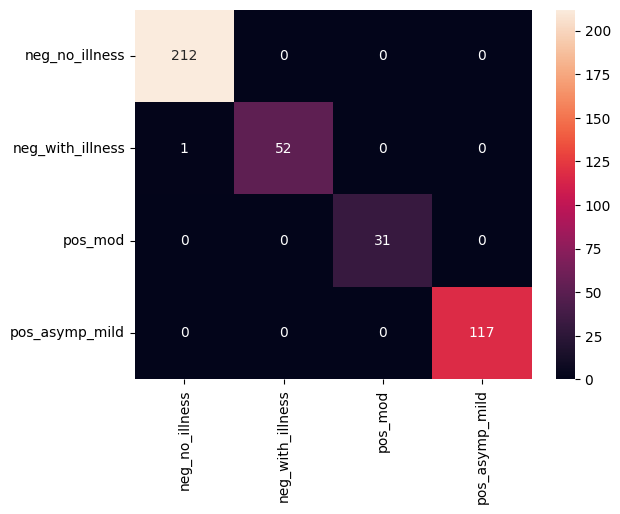

In [112]:
#Confusion Matrix
cm_rf=confusion_matrix(y_test, y_pred_rfc)
print('Confusion Matrix : \n', cm_rf)
sns.heatmap(confusion_matrix(y_test, y_pred_rfc),fmt='.4g',annot=True, xticklabels=cm_labels, yticklabels=cm_labels)

In [113]:
#Calculating and printing the values
sensitivities, specificities = calculate_sensitivity_specificity(cm_rf)
for cls in sensitivities:
    print(f'Class {cls}: Sensitivity (Recall): {sensitivities[cls]:.4f}')
    print(f'Class {cls}: Specificity: {specificities[cls]:.4f}')

Class neg_no_illness: Sensitivity (Recall): 1.0000
Class neg_no_illness: Specificity: 0.9950
Class neg_with_illness: Sensitivity (Recall): 0.9811
Class neg_with_illness: Specificity: 1.0000
Class pos_mod: Sensitivity (Recall): 1.0000
Class pos_mod: Specificity: 1.0000
Class pos_asymp_mild: Sensitivity (Recall): 1.0000
Class pos_asymp_mild: Specificity: 1.0000


In [115]:
# Log Loss
log_loss_value = log_loss(y_test, y_pred_prob_rfc)
print(f'Log Loss: {log_loss_value:.4f}')

Log Loss: 0.1142


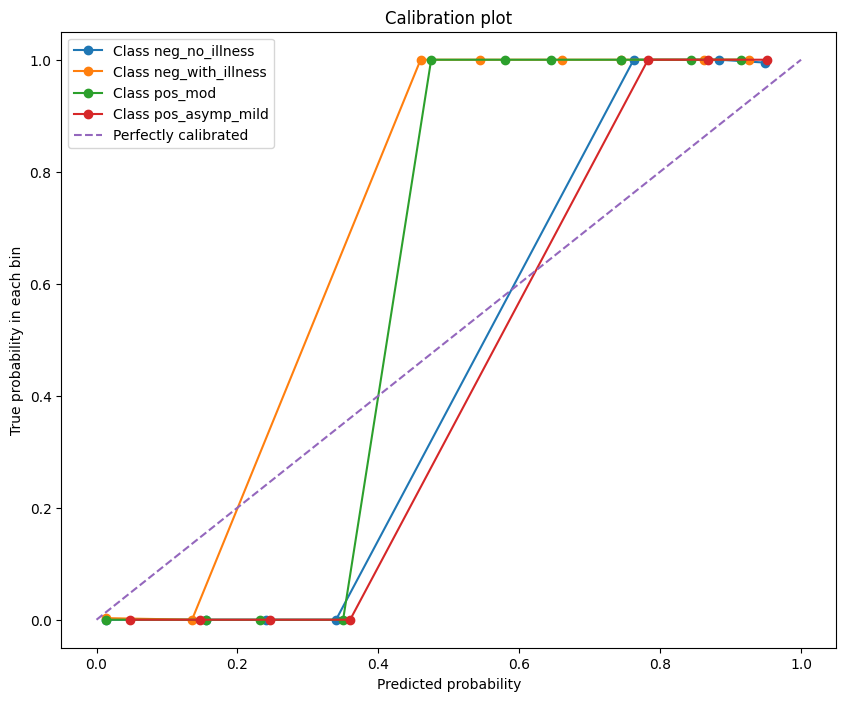

In [116]:
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    prob_true, prob_pred = calibration_curve(y_test == i, y_pred_prob_rfc[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'Class {label_map[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability in each bin')
plt.title('Calibration plot')
plt.legend()
plt.show()

In [104]:
#Classification Report

print('Classification Report : \n', classification_report(y_test,y_pred_rfc))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      0.98      0.99        53
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00       117

    accuracy                           1.00       413
   macro avg       1.00      1.00      1.00       413
weighted avg       1.00      1.00      1.00       413



Inference:
* Accuracy for training data is 100% and that of testing data is 99.75% which means that the model performed extremely well.
* The score for cross validation is 99.75% for 10 folds indicating a strong model.
* The ROC Curve score 0.99 which indicates high discrimination ability of the model.
* Overall the model is perfoming well with precision, recall and f1-score values indicating the same.

# Step 4: Overall Evaluation

- GBM with XG Boost

  - Accuracy for training data is 100% and that of testing data is 99.5% which means that the model performed extremely well.
  - The score for cross validation is 99.6% for 10 folds indicating a strong model.
  - The ROC Curve score 0.99 which indicates high discrimination ability of the model.
  - Low log loss (0.02) & perfect sensitivity and specificity scores.
  - Overall the model is perfoming well with precision, recall and f1-score values indicating the same.


- DenseNet
  - Even after adding additional layer the precision, recall, and f1-score remained similar defaulting to the model being average.
  - Log loss (1.3) & poor sensitivity scores were observed.
  - The Training and testing was at 56.18% and 51.33% similar to previous model.

- Random Forest
  - Accuracy for training data is 100% and that of testing data is 99.75% which means that the model performed extremely well.
  - The score for cross validation is 99.75% for 10 folds indicating a strong model.
  - The ROC Curve score 0.99 which indicates high discrimination ability of the model.
  - Low log loss (0.1) & perfect sensitivity and specificity scores.
  - Overall the model is perfoming well with precision, recall and f1-score values indicating the same.

Inferences:

- From metadata point of view, Gradient boosting with XGBoost performed much better for Coswara dataset (containing many null values).
- Random Forest comes second but as it used imputed data for analysis it cannot be used to build the actual model and is just for analysis purposes.
- DenseNet produced average results with accuracy of 51% in testing phase.